In [1]:
import pandas as pd
import re
import numpy as np
import os
import csv
from pandas import DataFrame

In [2]:
df = pd.read_csv('./project/idol/song_data_yewon_ver05.csv', header = 0, encoding = 'utf-8', low_memory=False)

In [3]:
df.head(10)

,title,artist,album,release_date,song_genre,is_title,like,creator,lyrics,lyricist,composer,arranger
0,태지 보이스,서태지와 아이들,시대유감(時代遺憾),1996.06.07,Rock,수록곡,269,서태지 작사 서태지 작곡 서태지 편곡,갈수 없는 곳이란 우리에겐 없어<br>보이는 길밖에도 세상은 있어<br>언제나 식지...,서태지,서태지,서태지
1,시대유감(時代遺憾),서태지와 아이들,시대유감(時代遺憾),1996.06.07,Rock,타이틀 곡,"3,265",서태지 작사 서태지 작곡 서태지 편곡,왜 기다려 왔잖아<br>모든 삶을 포기하는 소리를<br>이 세상이 모두 미쳐버릴<b...,서태지,서태지,서태지
2,수시아(誰是我),서태지와 아이들,시대유감(時代遺憾),1996.06.07,Rock,수록곡,488,서태지 작사 서태지 작곡 서태지 편곡,이 세상 그 누구도 나를 닮을 순 없네<br>날 세상에 알릴 거야<br>나 역시 그...,서태지,서태지,서태지
3,Free Style,서태지와 아이들,시대유감(時代遺憾),1996.06.07,Rock,수록곡,602,서태지 작사 김종서 작사 서태지 작곡 김종서 작곡 서태...,항상 난 지나치기만 했네<br>이젠 난 미련없이 끝내<br>됐어 찾아냈어 난<br>...,"서태지, 김종서","서태지, 김종서",서태지
4,난 알아요,서태지와 아이들,Seotaji And Boys Good Bye Best Album,1996.02.10,Dance,타이틀 곡,620,서태지 작사 서태지 작곡 서태지 편곡,난 알아요이밤이 흐르고 흐르면 누군가가<br>나를 떠나버려야 한다는 그사실을<br>...,서태지,서태지,서태지
5,너와 함께한 시간속에서,서태지와 아이들,Seotaji And Boys Good Bye Best Album,1996.02.10,Ballad,수록곡,591,서태지 작사 서태지 작곡 서태지 편곡,너와 함께 한 시간 속에서-<br> <br>너를 처음 만난 그때를<br>자세하게 말...,서태지,서태지,서태지
6,환상속의 그대,서태지와 아이들,Seotaji And Boys Good Bye Best Album,1996.02.10,Dance,인기 곡,"1,575",서태지 작사 서태지 작곡 서태지 편곡,환상속의 그대<br><br>결코! 시간이 멈추어 줄 순 없다 Yo!<br>무엇을 망...,서태지,서태지,서태지
7,하여가,서태지와 아이들,Seotaji And Boys Good Bye Best Album,1996.02.10,Dance,인기 곡,"3,666",서태지 작사 서태지 작곡 서태지 편곡,너에게 모든걸 뺏겨버렸던<br>마음이<br>다시 내게 돌아오는 걸<br>느꼈지<br...,서태지,서태지,서태지
8,너에게,서태지와 아이들,Seotaji And Boys Good Bye Best Album,1996.02.10,Ballad,인기 곡,"4,773",서태지 작사 WILLIAM BYUN 작사 서태지 작곡 서태지 ...,니가 아무리 지금 날 좋아한다고 해도<br>그건 지금뿐일지도 몰라<br>왜냐하면 어...,"서태지, WILLIAM BYUN",서태지,서태지
9,우리들만의 추억,서태지와 아이들,Seotaji And Boys Good Bye Best Album,1996.02.10,Ballad,인기 곡,"2,051",서태지 작사 서태지 작곡 서태지 편곡,한결 같은 너희들의 정성이<br>우리에겐 너무 커다란 힘이 되었지<br>편지속에 수...,서태지,서태지,서태지


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9861 entries, 0 to 9860
Data columns (total 12 columns):
title           9861 non-null object
artist          9861 non-null object
album           9861 non-null object
release_date    9861 non-null object
song_genre      9861 non-null object
is_title        9861 non-null object
like            9861 non-null object
creator         8637 non-null object
lyrics          9861 non-null object
lyricist        8553 non-null object
composer        8590 non-null object
arranger        7472 non-null object
dtypes: object(12)
memory usage: 924.5+ KB


## SM / YG /JYP 최근 대표 아이돌 가사유형

### SM
- 남 : 슈퍼주니어, 샤이니, 엑소
- 여 : 소녀시대, f(x), 레드벨벳

### JYP
- 남 : 2PM, 갓세븐, 스트레이키즈
- 여 : 원더걸스, 미쓰에이, 트와이스

### YG
- 남 : 빅뱅, 위너, 아이콘
- 여 : 2ne1, 블랙핑크

In [5]:
df[df["artist"].str.contains('엔씨티 드림', na=False)]

,title,artist,album,release_date,song_genre,is_title,like,creator,lyrics,lyricist,composer,arranger


In [6]:
SM_girls = df[df["artist"].str.contains('소녀시대|에프엑스|레드벨벳', na=False)]
SM_girls

,title,artist,album,release_date,song_genre,is_title,like,creator,lyrics,lyricist,composer,arranger
4605,Girls Are Back,소녀시대,Holiday Night - The 6th Album,2017.08.04,Dance,수록곡,"18,041",조윤경 작사 임정효 작사 디즈 작곡 Anne Judith Wi...,Ey I know it's been a while<br>I don't think<b...,"조윤경, 임정효","디즈, Anne Judith Wik, Che Jamal Pope",디즈
4606,All Night,소녀시대,Holiday Night - The 6th Album,2017.08.04,Dance,수록곡,"40,297",kenzie 작사 Ollipop 작곡 Daniel Caesar 작...,I like to party<br>아 알고 있잖아<br>All Night 우린 밤새...,kenzie,"Ollipop, Daniel Caesar, Ludwig Lindell, Hayley...","Ollipop, Caesar & Loui"
4607,Holiday,소녀시대,Holiday Night - The 6th Album,2017.08.04,Dance,수록곡,"68,050",서현 (SEOHYUN) 작사 JQ 작사 김혜정 작사 LAWRE...,Ho-Ho-Holiday Ho-Ho-Holiday<br>Ho-Ho-Holiday H...,"서현 (SEOHYUN), JQ, 김혜정","LAWRENCE LEE, Marta Grauers, Louise Frick Sveen",LAWRENCE LEE
4608,FAN,소녀시대,Holiday Night - The 6th Album,2017.08.04,R&B / Soul,타이틀 곡,"17,946",kenzie 작사 kenzie 작곡 kenzie 편곡,I've got love on my mind<br>let's turn our dre...,kenzie,kenzie,kenzie
4609,Only One,소녀시대,Holiday Night - The 6th Album,2017.08.04,R&B / Soul,수록곡,"16,094",1월 8일 작사 Andreas Oberg 작곡 Maria Marcus...,Only One Only One It’s you<br>Only One Only On...,1월 8일,"Andreas Oberg, Maria Marcus, Gustav Karlstrom",Maria Marcus
4610,One Last Time,소녀시대,Holiday Night - The 6th Album,2017.08.04,Ballad,수록곡,"18,109",이희주 작사 Mike Woods 작곡 Kevin White 작곡 ...,안부를 물어도 대답이 없는 너<br>날 보는 표정도 향기를 잃었어<br>침묵만 번지...,이희주,"Mike Woods, Kevin White, Andrew Bazzi, MZMC",Rice n` Peas
4611,Sweet Talk,소녀시대,Holiday Night - The 6th Album,2017.08.04,Dance,타이틀 곡,"15,264",서현 (SEOHYUN) 작사 Wassily Gradovsky 작곡 C...,Ahh-ooh Yeah<br>Ahh-ooh Woo yeah<br>Uh huh<br>...,서현 (SEOHYUN),"Wassily Gradovsky, Carolyn Jordan, Alice Penrose",Mussashi
4612,Love Is Bitter,소녀시대,Holiday Night - The 6th Album,2017.08.04,Blues,타이틀 곡,"16,294",황현 (MonoTree) 작사 황현 (MonoTree) 작곡 Mayu...,Ah 식어버려 향이 날라간 커피<br>한 입도 베물지 못해 마른 쿠키<br>달콤한 ...,황현 (MonoTree),"황현 (MonoTree), Mayu Wakisaka",황현 (MonoTree)
4613,오랜 소원 (It`s You),소녀시대,Holiday Night - The 6th Album,2017.08.04,Dance,수록곡,"15,531",유리 (YURI) 작사 Kevin Charge 작곡 Claire Ro...,Action<br>묘한 긴장감 속<br>나 홀로 마주한 시간이<br>외롭게만 느껴졌...,유리 (YURI),"Kevin Charge, Claire Rodrigues Lee",Kevin Charge
4614,Light Up the Sky,소녀시대,Holiday Night - The 6th Album,2017.08.04,Ballad,수록곡,"19,351",kenzie 작사 kenzie 작곡 Erik Lidbom 작곡 ...,Thinking ‘bout you<br>어디쯤 있었니<br>난 정말 달라진 게 없어...,kenzie,"kenzie, Erik Lidbom",Erik Lidbom


In [7]:
SM_boys = df[df["artist"].str.contains('슈퍼주니어|샤이니|엑소', na=False)]
SM_boys

,title,artist,album,release_date,song_genre,is_title,like,creator,lyrics,lyricist,composer,arranger
3474,Lo Siento (Feat. Leslie Grace),슈퍼주니어,REPLAY - The 8th Repackage Album,2018.04.12,Dance,타이틀 곡,"15,264",kenzie 작사 희철 (HEECHUL) 작사 은혁 (EUNHYUK)...,아찔히 빛나는 당신은<br>Special somebody<br>Whoa na na ...,"kenzie, 희철 (HEECHUL), 은혁 (EUNHYUK), Mario Cace...","Daniel Obi Klein, Charli Taft, Andreas Oberg, ...","Daniel Obi Klein, Play-N-Skillz"
3475,Black Suit,슈퍼주니어,REPLAY - The 8th Repackage Album,2018.04.12,Dance,On The Road,"3,847",이스란 작사 조윤경 작사 오민주 작사 임정효 작사 ES...,눈부신 Moonlight<br>또 다른 밤의 시작 하얗게<br>잘 다려 입은 Y-S...,"이스란, 조윤경, 오민주, 임정효, ESBEE","Martin Hoberg Hedegaard, Coach & Sendo","Martin Hoberg Hedegaard, Coach & Sendo"
3476,Scene Stealer,슈퍼주니어,REPLAY - The 8th Repackage Album,2018.04.12,Rap / Hip-hop,Are You Ready,"2,297",은혁 (EUNHYUK) 작사 Joseph 작곡 Davey Nate ...,Yo What’s up Get ready Okay<br>Put ‘em up now ...,은혁 (EUNHYUK),"Joseph, Davey Nate, Prince Chapelle, Phillip G...","Joseph, Phillip Guillory"
3477,Me & U,슈퍼주니어,REPLAY - The 8th Repackage Album,2018.04.12,Dance,수록곡,"6,253",이유진 작사 송민주(Jam Factory) 작사 조윤경 작사 ...,밤하늘에 별빛보다 반짝이는 눈<br>장미보다 아름다운 붉은 그 입술<br>뻔한 말 ...,"이유진, 송민주(Jam Factory), 조윤경, 은혁 (EUNHYUK)","Jamil `Digi` Chammas, Justin Lucas, M.BRONX, S...","Jamil `Digi` Chammas, Justin Lucas, Anthony Pavel"
3478,비처럼 가지 마요 (One More Chance),슈퍼주니어,REPLAY - The 8th Repackage Album,2018.04.12,Ballad,타이틀 곡,"3,437",동해 (DONGHAE) 작사 제이덥 (JDUB) 작사 은혁 (EUNH...,뚜렷했던 모습도 잊혀지나요<br>그런 시간이 있긴 한가요<br>No No<br>행복...,"동해 (DONGHAE), 제이덥 (JDUB), 은혁 (EUNHYUK)","동해 (DONGHAE), 제이덥 (JDUB)",제이덥 (JDUB)
3479,Good Day for a Good Day,슈퍼주니어,REPLAY - The 8th Repackage Album,2018.04.12,Dance,Pretty Poison,"2,024",조윤경 작사 박성희 작사 은혁 (EUNHYUK) 작사 Didr...,하루는 또 어제의 Dejavu<br>오늘 다 할 수 없는 오늘의 할 일<br>숨 가...,"조윤경, 박성희, 은혁 (EUNHYUK)","Didrik Thott, Josef Melin, Chris Meyer",Josef Melin
3480,Runaway,슈퍼주니어,REPLAY - The 8th Repackage Album,2018.04.12,Dance,슬픈 기적,"2,084",신아녜스 작사 Onestar 작곡 추대관 (MonoTree) 작곡...,언제든 Ru-ru-ru-ru-runaway<br>Ge-ge-ge-ge-getaway...,신아녜스,"Onestar, 추대관 (MonoTree), 적재","추대관 (MonoTree), 적재"
3481,Super Duper,슈퍼주니어,REPLAY - The 8th Repackage Album,2018.04.12,Dance,인기 곡,"3,004",Team One Sound 작사 이특 (LEETEUK) 작사 Team...,Super Duper Super Duper<br>Super Duper Super D...,"Team One Sound, 이특 (LEETEUK)","Team One Sound, 이특 (LEETEUK)","Team One Sound, IMLAY"
3482,The Lucky Ones,슈퍼주니어,REPLAY - The 8th Repackage Album,2018.04.12,R&B / Soul,Pretty Poison (Inst.),"1,906",서지음 작사 진리 (Full8loom) 작사 Lee Paul Will...,결국 바라는 건 있지<br>단순해지게 되더라<br>부귀와 영화도 괜찮지<br>근사한...,"서지음, 진리 (Full8loom)","Lee Paul Williams, Jorgen Elofsson, Anton Mĺrt...","Lee Paul Williams, Jorgen Elofsson, Anton Mĺrt..."
3483,예뻐 보여 (Girlfriend),슈퍼주니어,REPLAY - The 8th Repackage Album,2018.04.12,R&B / Soul,슬픈 기적 (Inst.),"1,787",이스란 작사 은혁 (EUNHYUK) 작사 다비 (DAVII) 작곡...,이상해 우리 사이<br>말로 설명할 수가 없어<br>복잡해 도무지 정의가 안돼<br...,"이스란, 은혁 (EUNHYUK)",다비 (DAVII),다비 (DAVII)


In [8]:
YG_girls = df[df["artist"].str.contains('투애니원|블랙핑크', na=False)]
YG_girls

,title,artist,album,release_date,song_genre,is_title,like,creator,lyrics,lyricist,composer,arranger
5261,안녕,투애니원,안녕,2017.01.21,Ballad,수록곡,"26,875",CL 작사 오혁 작사 J Gramm 작곡 Rook Monroe...,- 안녕 -<br><br>가지 마<br>날 버리고 가겠다는 말은 하지 마<br>기억...,"CL, 오혁","J Gramm, Rook Monroe",NaN
5262,Crush,투애니원,CRUSH,2014.02.27,Electronica,수록곡,"20,809",CL 작사 CL 작곡 CHOICE37 작곡 CHOICE37 편곡,난 모든 여자들의 뜨거운 crush<br>너의 심장을 뛰게 하는 rush<br>예쁜...,CL,"CL, CHOICE37",CHOICE37
5263,Come Back Home,투애니원,CRUSH,2014.02.27,Electronica,수록곡,"66,938",TEDDY 작사 TEDDY 작곡 PK 작곡 DEE.P (FUT...,One two three<br>넌 나를 떠났지만<br>어딘가에서 너의 숨소리가<br...,TEDDY,"TEDDY, PK, DEE.P (FUTURE BOUNCE)","TEDDY, PK, DEE.P (FUTURE BOUNCE)"
5264,너 아님 안돼,투애니원,CRUSH,2014.02.27,Electronica,수록곡,"43,538",TEDDY 작사 MASTA WU 작사 TEDDY 작곡 PK ...,새로운 만남은 싫어 왠지 몰라도<br>여전히 네가 많이 미워 아직도<br>운명 같던...,"TEDDY, MASTA WU","TEDDY, PK",PK
5265,살아 봤으면 해,투애니원,CRUSH,2014.02.27,R&B / Soul,수록곡,"47,922",CL 작사 CL 작곡 DEE.P (FUTURE BOUNCE) 작곡...,오늘도 이렇게 하루가 지나가네<br>온종일 나 너만을 위해 보냈는데<br>네가 가장...,CL,"CL, DEE.P (FUTURE BOUNCE)",DEE.P (FUTURE BOUNCE)
5266,착한 여자,투애니원,CRUSH,2014.02.27,R&B / Soul,수록곡,"14,522",TEDDY 작사 G-DRAGON 작사 TEDDY 작곡 CHOI...,모두 나쁜 남자라 해도<br>솔직한 니가 좋았어<br>It felt right<br...,"TEDDY, G-DRAGON","TEDDY, CHOICE37",CHOICE37
5267,멘붕 (CL Solo),투애니원,CRUSH,2014.02.27,Electronica,수록곡,"34,363",TEDDY 작사 CL 작사 TEDDY 작곡 TEDDY 편곡,자 지켜봐라 이 진동의 힘<br>척추를 타고 내려온 이 느낌<br>꽃 한 송이 피우...,"TEDDY, CL",TEDDY,TEDDY
5268,Happy,투애니원,CRUSH,2014.02.27,Electronica,타이틀 곡,"18,549",TEDDY 작사 TEDDY 작곡 TEDDY 편곡,Happy<br><br>가끔은 내 생각할까<br>아님 너무 희미해<br>그 의미조차...,TEDDY,TEDDY,TEDDY
5269,Scream,투애니원,CRUSH,2014.02.27,Electronica,수록곡,"14,350",CL 작사 TEDDY 작곡 DEE.P (FUTURE BOUNCE) ...,Scream ah ah ah ah<br>ah ah ah ah ah ah<br>Scr...,CL,"TEDDY, DEE.P (FUTURE BOUNCE)",DEE.P (FUTURE BOUNCE)
5270,Baby I Miss You,투애니원,CRUSH,2014.02.27,R&B / Soul,타이틀 곡,"12,945",CL 작사 CL 작곡 CHOICE37 작곡 PEEJAY 작...,Baby I miss you<br>네가 보고 싶어<br>아직 표현할 수 없지만<br...,CL,"CL, CHOICE37, PEEJAY","CHOICE37, PEEJAY"


In [9]:
YG_boys = df[df["artist"].str.contains('빅뱅|위너|아이콘', na=False)]
YG_boys

,title,artist,album,release_date,song_genre,is_title,like,creator,lyrics,lyricist,composer,arranger
3882,꽃 길,빅뱅,꽃 길,2018.03.13,R&B / Soul,수록곡,"173,868",G-DRAGON 작사 T.O.P 작사 G-DRAGON 작곡 T...,그땐 참 좋았는데 말이야<br>너와 함께할 수만 있다면<br>때론 외롭고 슬퍼도 말...,"G-DRAGON, T.O.P","G-DRAGON, The Fliptones","G-DRAGON, The Fliptones"
3883,에라 모르겠다,빅뱅,MADE,2016.12.13,Rap / Hip-hop,수록곡,"163,640",TEDDY 작사 G-DRAGON 작사 T.O.P 작사 TEDD...,No I don't wanna go too fast<br>Cuz nothing re...,"TEDDY, G-DRAGON, T.O.P","TEDDY, G-DRAGON, R.Tee","TEDDY, R.Tee"
3884,LAST DANCE,빅뱅,MADE,2016.12.13,Ballad,수록곡,"115,204",G-DRAGON 작사 T.O.P 작사 태양 작사 G-DRAGO...,영원할 줄 알았던 사랑도 저물고<br>이젠 그 흔한 친구마저 떠나가네요<br>나이가...,"G-DRAGON, T.O.P, 태양","G-DRAGON, 전용준, 서원진","서원진, 24"
3885,GIRLFRIEND,빅뱅,MADE,2016.12.13,Rap / Hip-hop,수록곡,"61,208",TEDDY 작사 G-DRAGON 작사 T.O.P 작사 TEDD...,어쩜 그렇게 예쁠 수가 있을까<br>첫 만남보다 설렌대도 믿을까<br>하루하루가 혹...,"TEDDY, G-DRAGON, T.O.P","TEDDY, G-DRAGON, CHOICE37","TEDDY, CHOICE37"
3886,우리 사랑하지 말아요,빅뱅,MADE,2016.12.13,Dance,수록곡,"13,863",TEDDY 작사 G-DRAGON 작사 TEDDY 작곡 G-DR...,우리 사랑하지 말아요<br>아직은 잘 모르잖아요<br>사실 조금은 두려운 거야<br...,"TEDDY, G-DRAGON","TEDDY, G-DRAGON",TEDDY
3887,LOSER,빅뱅,MADE,2016.12.13,Rap / Hip-hop,수록곡,"13,430",TEDDY 작사 T.O.P 작사 G-DRAGON 작사 TEDD...,LOSER 외톨이<br>센 척하는 겁쟁이<br>못된 양아치 거울 속에 넌<br>JU...,"TEDDY, T.O.P, G-DRAGON","TEDDY, 태양",TEDDY
3888,BAE BAE,빅뱅,MADE,2016.12.13,Rap / Hip-hop,수록곡,"11,863",G-DRAGON 작사 TEDDY 작사 T.O.P 작사 TEDD...,I'M IN LOVE<br>눈에 콩깍지 씌었어 BABE<br>하의 실종에 흰 와이셔...,"G-DRAGON, TEDDY, T.O.P","TEDDY, G-DRAGON, T.O.P",TEDDY
3889,뱅뱅뱅 (BANG BANG BANG),빅뱅,MADE,2016.12.13,Rap / Hip-hop,타이틀 곡,"14,949",TEDDY 작사 G-DRAGON 작사 T.O.P 작사 TEDD...,난 깨어나 까만 밤과 함께<br>다 들어와 담엔 누구 차례<br>한 치 앞도 볼 수...,"TEDDY, G-DRAGON, T.O.P","TEDDY, G-DRAGON",TEDDY
3890,맨정신,빅뱅,MADE,2016.12.13,Rock,수록곡,"11,331",TEDDY 작사 G-DRAGON 작사 T.O.P 작사 TEDD...,제발 좀 잘난 척 하지 마<br>알고 보면 네가 제일 불쌍해<br>그래 날 더 자극...,"TEDDY, G-DRAGON, T.O.P","TEDDY, CHOICE37, G-DRAGON","TEDDY, CHOICE37"
3891,IF YOU,빅뱅,MADE,2016.12.13,Folk,수록곡,"15,045",G-DRAGON 작사 G-DRAGON 작곡 PK 작곡 DEE....,그녀가 떠나가요<br>나는 아무것도 할 수 없어요<br>사랑이 떠나가요<br>나는 ...,G-DRAGON,"G-DRAGON, PK, DEE.P","PK, DEE.P"


In [10]:
JYP_girls = df[df["artist"].str.contains('원더걸스|미쓰에이|트와이스', na=False)]
JYP_girls

,title,artist,album,release_date,song_genre,is_title,like,creator,lyrics,lyricist,composer,arranger
4548,그려줘,원더걸스,그려줘,2017.02.10,Ballad,수록곡,"16,274",핫펠트 (예은) 작사 유빈 (Yubin) 작사 핫펠트 (예은) 작...,벌써 너를 처음 본<br>계절이 여기 다시<br>새하얀 캔버스<br>위에 서로의 모...,"핫펠트 (예은), 유빈 (Yubin)","핫펠트 (예은), 유빈 (Yubin), 홍지상",홍지상
4549,Why So Lonely,원더걸스,Why So Lonely,2016.07.05,Dance,타이틀 곡,"120,655",혜림 (원더걸스) 작사 선미 작사 유빈 (Yubin) 작사 홍...,너와 입술이 닿을 때부터<br>모든 게 달라질 줄 알았는데<br>별거 없어 넌 다른...,"혜림 (원더걸스), 선미, 유빈 (Yubin), 홍지상","선미, 혜림 (원더걸스), 유빈 (Yubin), 홍지상",홍지상
4550,아름다운 그대에게,원더걸스,Why So Lonely,2016.07.05,Dance,수록곡,"14,078",선미 작사 유빈 (Yubin) 작사 혜림 (원더걸스) 작사 F...,매일 하늘을<br>오르내리는 것 같아<br>널 보고 있을 때면<br>정말로 우린 커...,"선미, 유빈 (Yubin), 혜림 (원더걸스), FRANTS","선미, 유빈 (Yubin), 혜림 (원더걸스), FRANTS",FRANTS
4551,Sweet & Easy,원더걸스,Why So Lonely,2016.07.05,Dance,수록곡,"10,157",핫펠트 (예은) 작사 유빈 (Yubin) 작사 핫펠트 (예은) 작...,Don’t think<br>뭘 그렇게 조심스러워해<br>자연스런 거잖아 우리 사이에...,"핫펠트 (예은), 유빈 (Yubin)","핫펠트 (예은), 유빈 (Yubin), 홍지상",홍지상
4552,Baby Don`t Play,원더걸스,REBOOT,2015.08.03,Dance,타이틀 곡,"8,324",핫펠트 (예은) 작사 홍지상 작사 핫펠트 (예은) 작곡 홍지상...,내 맘을 Play 하지마<br>Baby don’t play<br>My heart B...,"핫펠트 (예은), 홍지상","핫펠트 (예은), 홍지상","핫펠트 (예은), 홍지상"
4553,Candle (Feat. Paloalto),원더걸스,REBOOT,2015.08.03,Dance,수록곡,"5,499",혜림 (원더걸스) 작사 FRANTS 작사 팔로알토(Paloalto) ...,I'm your candle<br>아슬아슬하게 흔들려 난<br>니가 닿으면 녹아버릴...,"혜림 (원더걸스), FRANTS, 팔로알토(Paloalto)","혜림 (원더걸스), FRANTS","혜림 (원더걸스), FRANTS"
4554,I Feel You,원더걸스,REBOOT,2015.08.03,Dance,수록곡,"53,547",박진영 작사 박진영 작곡 e.one 작곡 박진영 편곡 ...,내게 걸어놓은 마법이 뭔지<br>헤어 나오질 못하고 있어<br>한번도 이런 적이 없...,박진영,"박진영, e.one","박진영, 홍지상"
4555,Rewind,원더걸스,REBOOT,2015.08.03,Ballad,타이틀 곡,"6,338",선미 작사 주효 작사 이토요 작사 선미 작곡 주효 ...,미처 몰랐던 니 모습<br>그렇게 날 두고 떠나<br>마주잡은 두 손이 차갑게<br...,"선미, 주효, 이토요","선미, 주효, 이토요","선미, 주효, 이토요"
4556,Loved,원더걸스,REBOOT,2015.08.03,Dance,수록곡,"4,148",유빈 (Yubin) 작사 심은지 작사 유빈 (Yubin) 작곡 ...,I’ve loved you like a fool<br>알아 모두 아는 연애의 룰<b...,"유빈 (Yubin), 심은지","유빈 (Yubin), 심은지",심은지
4557,John Doe,원더걸스,REBOOT,2015.08.03,Dance,타이틀 곡,"5,076",유빈 (Yubin) 작사 홍지상 작사 주효 작사 유빈 (Yub...,자꾸만 느껴져 어디선가 날<br>훑어 내려가는 아찔한 시선<br>어둔 조명 아래 빛...,"유빈 (Yubin), 홍지상, 주효","유빈 (Yubin), 홍지상, 주효","유빈 (Yubin), 홍지상, 주효"


In [11]:
JYP_boys = df[df["artist"].str.contains('투피엠|갓세븐|스트레이 키즈', na=False)]
JYP_boys

,title,artist,album,release_date,song_genre,is_title,like,creator,lyrics,lyricist,composer,arranger
4966,Promise (I`ll be),투피엠,GENTLEMEN`S GAME,2016.09.13,"Dance,Electronica",수록곡,"11,532",택연 작사 Lesley Chiang 작사 라파엘 작사 택연 ...,시계만 쳐다보고 있어<br>기다리기가 너무 힘들어<br>1분 1초가 너무 길어<br...,"택연, Lesley Chiang, 라파엘","택연, Lesley Chiang, 라파엘",라파엘
4967,Uneasy,투피엠,GENTLEMEN`S GAME,2016.09.13,R&B / Soul,수록곡,"2,793",찬성 작사 Jimmy Burney 작곡 Jonas W. Karlsso...,차갑게 굳어 버린 듯<br>내 기분이 나아지질 않아<br>독하게 뿜어져 나온<br>...,찬성,"Jimmy Burney, Jonas W. Karlsson",Jonas W. Karlsson
4968,Giv u Class.,투피엠,GENTLEMEN`S GAME,2016.09.13,R&B / Soul,수록곡,"2,612",장우영 작사 장우영 작곡 변현민 작곡 변현민 편곡,이미 느끼면서도 모르는 척<br>아니 라면서도 날 못 놓는건<br>틀린 답이 아냐 ...,장우영,"장우영, 변현민",변현민
4969,Make Love,투피엠,GENTLEMEN`S GAME,2016.09.13,R&B / Soul,수록곡,"2,686",찬성 작사 택연 작사 찬성 작곡 를(LEL) 작곡 를(...,멍하니 널 바라만 보게만 돼<br>마치 니가 내 여자가<br>맞는 건지 아닌지<br...,"찬성, 택연","찬성, 를(LEL)",를(LEL)
4970,시도때도없이,투피엠,GENTLEMEN`S GAME,2016.09.13,Rap / Hip-hop,수록곡,"2,528",김원 작사 김원 작곡 김원 편곡 별나라 언니 편곡,돌아서면 또 그립고<br>보고 있어도 보고픈걸<br>말이 너무너무 잘 통해<br>서...,김원,김원,"김원, 별나라 언니"
4971,Never,투피엠,GENTLEMEN`S GAME,2016.09.13,R&B / Soul,수록곡,"2,615",주찬양 (티맥스) 작사 220 작곡 앤드류 최 작곡 Secre...,여전히 나는 꿈을 꿔<br>우리 둘이 걸어가는 꿈<br>그래 믿지 못해<br>이제 ...,주찬양 (티맥스),"220, 앤드류 최, Secret Weapon","220, Secret Weapon"
4972,콧노래,투피엠,GENTLEMEN`S GAME,2016.09.13,R&B / Soul,수록곡,"2,759",장우영 작사 를(LEL) 작사 Wizil 작사 장우영 작곡...,Let's start from the beginning<br>Yes It's goo...,"장우영, 를(LEL), Wizil","장우영, 를(LEL)",를(LEL)
4973,어때?,투피엠,GENTLEMEN`S GAME,2016.09.13,R&B / Soul,수록곡,"2,579",이주형 (MonoTree) 작사 BUMZU 작사 이주형 (MonoTr...,누가 또 괴롭혀 참 나빠<br>착하디 착한 널 왜 못 살게 굴어<br>오늘 하루 다...,"이주형 (MonoTree), BUMZU","이주형 (MonoTree), BUMZU, Jonas Mengler",Jonas Mengler
4974,향수,투피엠,GENTLEMEN`S GAME,2016.09.13,R&B / Soul,타이틀 곡,"2,503",e.one 작사 택연 작사 e.one 작곡 e.one 편곡,Oh who's that girl<br>날 자극하는 너 그 뒤를 따라갔어<br>은은...,"e.one, 택연",e.one,e.one
4975,My Last,투피엠,GENTLEMEN`S GAME,2016.09.13,R&B / Soul,수록곡,"2,322",이주형 (MonoTree) 작사 NOPARI (MonoTree) 작사 ...,잘 지냈는지 몰라<br>무슨 말부터 해야<br>문득 떠올라 그냥<br>Just no...,"이주형 (MonoTree), NOPARI (MonoTree), GDLO (MonoT...","이주형 (MonoTree), NOPARI (MonoTree)",NOPARI (MonoTree)


In [12]:
g_Group_list = [SM_girls, YG_girls, JYP_girls]
song_counts = []

for a in g_Group_list:
    song_counts.append(len(a))
print(song_counts)

[279, 47, 145]


In [13]:
g_Group_list_song_counts = {'SM 걸그룹' : 279,
                         'YG 걸그룹' : 47,
                         'JYP 걸그룹' : 145}

In [14]:
g_Group_df = pd.DataFrame(list(g_Group_list_song_counts.items()), columns={'그룹', '곡수'})
g_Group_df

,곡수,그룹
0,SM 걸그룹,279
1,YG 걸그룹,47
2,JYP 걸그룹,145


In [15]:
import matplotlib.pyplot as plt

%matplotlib inline

[Text(0,0,'SM 걸그룹'), Text(0,0,'YG 걸그룹'), Text(0,0,'JYP 걸그룹')]

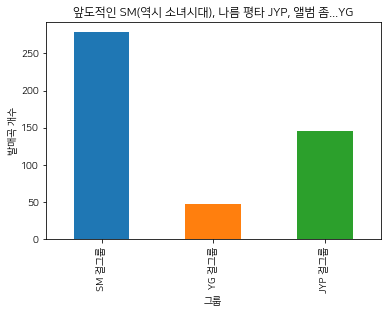

In [16]:
#간단하게 그룹별로 곡수를 그래프로 표현해봄
plot = g_Group_df['그룹'].plot(kind='bar', stacked=False, title= "앞도적인 SM(역시 소녀시대), 나름 평타 JYP, 앨범 좀...YG")
plot.set_xlabel("그룹")
plot.set_ylabel("발매곡 개수")
plot.set_xticklabels(g_Group_df['곡수'])

In [17]:
b_Group_list = [SM_boys, YG_boys, JYP_boys]
song_counts = []

for a in b_Group_list:
    song_counts.append(len(a))
print(song_counts)

[519, 173, 186]


In [18]:
b_Group_list_song_counts = {'SM 보이그룹' : 519,
                         'YG 보이그룹' : 173,
                         'JYP 보이그룹' : 186}

In [19]:
b_Group_df = pd.DataFrame(list(b_Group_list_song_counts.items()), columns={"그룹", "곡수"})
b_Group_df

,곡수,그룹
0,SM 보이그룹,519
1,YG 보이그룹,173
2,JYP 보이그룹,186


[Text(0,0,'SM 보이그룹'), Text(0,0,'YG 보이그룹'), Text(0,0,'JYP 보이그룹')]

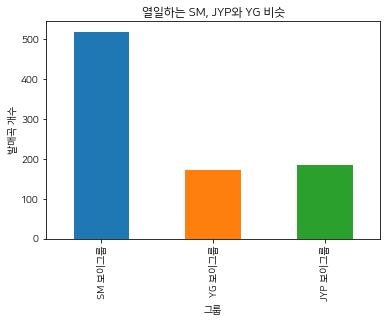

In [21]:
#간단하게 그룹별로 곡수를 그래프로 표현해봄
plot = b_Group_df['그룹'].plot(kind='bar', stacked=False, title= "열일하는 SM, JYP와 YG 비슷")
plot.set_xlabel("그룹")
plot.set_ylabel("발매곡 개수")
plot.set_xticklabels(b_Group_df['곡수'])

# 텍스트 마이닝

In [22]:
!pip install --upgrade pip

Requirement already up-to-date: pip in c:\anaconda3\lib\site-packages (18.0)


In [23]:
from konlpy.tag import Twitter
twi_tagger = Twitter()
from konlpy.utils import pprint

C:\Anaconda3\lib\site-packages\konlpy\tag\_okt.py:16: UserWarning: "Twitter" has changed to "Okt" since KoNLPy v0.4.5.
  warn('"Twitter" has changed to "Okt" since KoNLPy v0.4.5.')


In [24]:
!pip install JPype1-0.6.3-cp36-cp36m-win_amd64.whl

In [25]:
!pip install konlpy

In [26]:
from bs4 import BeautifulSoup
from nltk.corpus import stopwords

## SM girls

In [27]:
#테스트
words_temp = twi_tagger.pos(SM_girls["lyrics"][4605], norm=True, stem=True)

In [28]:
pprint(words_temp)

[('Ey', 'Alpha'),
 ('I', 'Alpha'),
 ('know', 'Alpha'),
 ('it', 'Alpha'),
 ("'", 'Punctuation'),
 ('s', 'Alpha'),
 ('been', 'Alpha'),
 ('a', 'Alpha'),
 ('while', 'Alpha'),
 ('<', 'Punctuation'),
 ('br', 'Alpha'),
 ('>', 'Punctuation'),
 ('I', 'Alpha'),
 ('don', 'Alpha'),
 ("'", 'Punctuation'),
 ('t', 'Alpha'),
 ('think', 'Alpha'),
 ('<', 'Punctuation'),
 ('br', 'Alpha'),
 ('>', 'Punctuation'),
 ('we', 'Alpha'),
 ("'", 'Punctuation'),
 ('ve', 'Alpha'),
 ('got', 'Alpha'),
 ('the', 'Alpha'),
 ('girls', 'Alpha'),
 ('out', 'Alpha'),
 ('woo', 'Alpha'),
 ('<', 'Punctuation'),
 ('br', 'Alpha'),
 ('>', 'Punctuation'),
 ('Woo', 'Alpha'),
 ('woo', 'Alpha'),
 ('woo', 'Alpha'),
 ('woo', 'Alpha'),
 ('yeah', 'Alpha'),
 ('<', 'Punctuation'),
 ('br', 'Alpha'),
 ('>', 'Punctuation'),
 ('Uh', 'Alpha'),
 ('you', 'Alpha'),
 ('feel', 'Alpha'),
 ('that', 'Alpha'),
 ('<', 'Punctuation'),
 ('br', 'Alpha'),
 ('>', 'Punctuation'),
 ('It', 'Alpha'),
 ('feels', 'Alpha'),
 ('good', 'Alpha'),
 ('right', 'Alpha'),
 ('

In [29]:
# (돈, Noun) -> "돈/Noun" 형태로 형태소 분석.
def tokenizer_twit(doc):
    return ['/'.join(t) for t in twi_tagger.pos(doc, norm=True, stem=True)]

In [30]:
# 리뷰 단어 리스트 형태로 만듦
def review_to_wordlist(review):
    try:
        review_text = BeautifulSoup(review.strip()).get_text()
    except AttributeError:
        review_text = ""
    review_words = tokenizer_twit(review_text)
    return review_words

In [31]:
#단어를 품사 단위로 
words=[]
for review in SM_girls["lyrics"]:
    words += review_to_wordlist(review)

C:\Anaconda3\lib\site-packages\bs4\__init__.py:181: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 193 of the file C:\Anaconda3\lib\runpy.py. To get rid of this warning, change code that looks like this:

 BeautifulSoup(YOUR_MARKUP})

to this:

 BeautifulSoup(YOUR_MARKUP, "lxml")

  markup_type=markup_type))


In [32]:
#단어 단위로 분해
pprint(words[:10])

['Ey/Alpha',
 'I/Alpha',
 'know/Alpha',
 'it/Alpha',
 "'/Punctuation",
 's/Alpha',
 'been/Alpha',
 'a/Alpha',
 'whileI/Alpha',
 'don/Alpha']


In [33]:
import nltk

In [34]:
##문서 탐색을 위한 기능 호출
words_nltk = nltk.Text(words, name="Words in lyrics")

In [35]:
#전체 개수 세기
len(words_nltk.vocab())

6501

In [36]:
# 전체 텍스트 마이닝 결과 출력
SM_g_text = pprint(words_nltk.vocab().most_common(6501))

[('하다/Verb', 1210),
 ('을/Josa', 1116),
 ('에/Josa', 1108),
 ('너/Noun', 992),
 ('이/Josa', 930),
 ('의/Josa', 766),
 ('내/Noun', 673),
 ('보다/Verb', 585),
 ('가/Josa', 579),
 ('나/Noun', 575),
 ('Oh/Alpha', 570),
 ("'/Punctuation", 535),
 ('사랑/Noun', 495),
 ('있다/Adjective', 489),
 ('를/Josa', 458),
 ('은/Josa', 442),
 ('I/Alpha', 441),
 ('없다/Adjective', 437),
 ('말/Noun', 433),
 ('날/Noun', 431),
 ('도/Josa', 429),
 ('난/Noun', 414),
 ('맘/Noun', 403),
 ('는/Josa', 380),
 ('네/Noun', 353),
 ('그/Noun', 352),
 ('더/Noun', 346),
 ('La/Alpha', 323),
 ('눈/Noun', 313),
 ('-/Punctuation', 305),
 ('그대/Noun', 304),
 ('you/Alpha', 300),
 ('같다/Adjective', 285),
 ('또/Noun', 282),
 ('넌/Noun', 278),
 ('않다/Verb', 272),
 ('처럼/Josa', 270),
 ('수/Noun', 269),
 ('속/Noun', 265),
 ('만/Josa', 264),
 ('me/Alpha', 242),
 ('oh/Alpha', 234),
 ('것/Noun', 225),
 ('it/Alpha', 223),
 ('이/Noun', 221),
 ('모르다/Verb', 219),
 ('들/Suffix', 219),
 ('s/Alpha', 215),
 ('우리/Noun', 215),
 ('You/Alpha', 214),
 ('다/Adverb', 211),
 ('싶다/Verb', 211

 ('홀로/Noun', 7),
 ('그래서/Adverb', 7),
 ('피다/Verb', 7),
 ('And/Alpha', 7),
 ('떠오르다/Verb', 7),
 ('여행/Noun', 7),
 ('불안하다/Adjective', 7),
 ('첨/Adverb', 7),
 ('애가/Noun', 7),
 ('영혼/Noun', 7),
 ('Wow/Alpha', 7),
 ('think/Alpha', 7),
 ('ain/Alpha', 7),
 ('than/Alpha', 7),
 ('Here/Alpha', 7),
 ('푸른/Noun', 7),
 ('숲/Noun', 7),
 ('덮다/Verb', 7),
 ('이해/Noun', 7),
 ('아차/Noun', 7),
 ('이래/Josa', 7),
 ('Lightbeep/Alpha', 7),
 ('헷갈리다/Adjective', 7),
 ('열/Noun', 7),
 ('Did/Alpha', 7),
 ('지켜보다/Verb', 7),
 ('쫓아가다/Verb', 7),
 ('Really/Alpha', 7),
 ('내미다/Verb', 7),
 ('매/Modifier', 7),
 ('손짓/Noun', 7),
 ('쥐다/Verb', 7),
 ('와도/Josa', 7),
 ('사인/Noun', 7),
 ('행운/Noun', 7),
 ('dream/Alpha', 7),
 ('보다는/Josa', 7),
 ('이라고/Josa', 7),
 ('사/Modifier', 7),
 ('넘어가다/Verb', 7),
 ('New/Alpha', 7),
 ('Sound/Alpha', 7),
 ('속상하다/Adjective', 7),
 ('툭툭/Noun', 7),
 ('반짝반짝/Adverb', 7),
 ('만지다/Verb', 7),
 ('에이/Noun', 7),
 ('춤추다/Verb', 7),
 ('가져가다/Verb', 7),
 ('줄다/Verb', 7),
 ('bring/Alpha', 7),
 ('노력/Noun', 7),
 ('설마/Noun', 7),
 ('끼다/

 ('눈감다/Verb', 3),
 ('상관없다/Adjective', 3),
 ('해조/Noun', 3),
 ('need/Alpha', 3),
 ('밉다/Adjective', 3),
 ('thatNa/Alpha', 3),
 ('맨/Noun', 3),
 ('게너/Noun', 3),
 ('throw/Alpha', 3),
 ('보다도/Josa', 3),
 ('반한/Noun', 3),
 ('heartI/Alpha', 3),
 ('heartCatch/Alpha', 3),
 ('과거/Noun', 3),
 ('life/Alpha', 3),
 ('미랠/Noun', 3),
 ('재다/Verb', 3),
 ('앞서/Noun', 3),
 ('내주다/Verb', 3),
 ('수없이/Adverb', 3),
 ('goodgoodbye/Alpha', 3),
 ('돌/Noun', 3),
 ('며/Josa', 3),
 ('깜깜/Noun', 3),
 ('wait/Alpha', 3),
 ('도망가다/Verb', 3),
 ('(/Punctuation', 3),
 (')/Punctuation', 3),
 ('cover/Alpha', 3),
 ('찾아가다/Verb', 3),
 ('soulTake/Alpha', 3),
 ('서도/Noun', 3),
 ('Flyers/Alpha', 3),
 ('GoShake/Alpha', 3),
 ('UpShake/Alpha', 3),
 ('Ride/Alpha', 3),
 ('SkyMovin/Alpha', 3),
 ('이치/Noun', 3),
 ('켓떼/Noun', 3),
 ('TheFlyersShake/Alpha', 3),
 ('OutShake/Alpha', 3),
 ('유라/Noun', 3),
 ('도코/Noun', 3),
 ('닷/Modifier', 3),
 ('비감/Noun', 3),
 ('눈길/Noun', 3),
 ('셀/Noun', 3),
 ('숙녀/Noun', 3),
 ('친굴/Noun', 3),
 ('아들/Noun', 3),
 ('ahOh/Alpha', 3

 ('yeahSo/Alpha', 2),
 ('결정/Noun', 2),
 ('챙기다/Verb', 2),
 ('다녀가다/Verb', 2),
 ('ohWhen/Alpha', 2),
 ('AWhen/Alpha', 2),
 ('yeahWhen/Alpha', 2),
 ('대니/Noun', 2),
 ('실제/Noun', 2),
 ('목격자/Noun', 2),
 ('침몰/Noun', 2),
 ('파동/Noun', 2),
 ('부엌/Noun', 2),
 ('우유/Noun', 2),
 ('칭칭/Noun', 2),
 ('블링블링/Noun', 2),
 ('낫다/Verb', 2),
 ('해난/Noun', 2),
 ('병/Noun', 2),
 ('궤도/Noun', 2),
 ('Butterfly/Alpha', 2),
 ('LaHey/Alpha', 2),
 ('OhWhat/Alpha', 2),
 ('upa/Alpha', 2),
 ('래서/Noun', 2),
 ('얼/Noun', 2),
 ('붕/Noun', 2),
 ('OhOh/Alpha', 2),
 ('아무래도/Adverb', 2),
 ('상태/Noun', 2),
 ('벌레/Noun', 2),
 ('실실/Noun', 2),
 ('Yellow/Alpha', 2),
 ('주황색/Noun', 2),
 ('찾아내다/Verb', 2),
 ('주스/Noun', 2),
 ('버스/Noun', 2),
 ('계획/Noun', 2),
 ('양심/Noun', 2),
 ('씹다/Verb', 2),
 ('껌뻑/Adverb', 2),
 ('면서/Noun', 2),
 ('보글보글/Adverb', 2),
 ('Spit/Alpha', 2),
 ('당장/Noun', 2),
 ('타고나다/Verb', 2),
 ('Rah/Alpha', 2),
 ('푸다/Verb', 2),
 ('순식간/Noun', 2),
 ('넘어오다/Verb', 2),
 ('Youbetter/Alpha', 2),
 ('Yo/Alpha', 2),
 ('간단하다/Adjective', 2),
 ('초능력/No

 ('end/Alpha', 1),
 ('startjump/Alpha', 1),
 ('higheroh/Alpha', 1),
 ('yeahvisual/Alpha', 1),
 ('beating/Alpha', 1),
 ('heartOne/Alpha', 1),
 ('meHurry/Alpha', 1),
 ('쓰윽/Noun', 1),
 ('meyeah/Alpha', 1),
 ('boyI/Alpha', 1),
 ('moreJust/Alpha', 1),
 ('tell/Alpha', 1),
 ('RightAlright/Alpha', 1),
 ('난날/Noun', 1),
 ('loveIt/Alpha', 1),
 ('OKTake/Alpha', 1),
 ('wordsGirl/Alpha', 1),
 ('knowGirl/Alpha', 1),
 ('sexy/Alpha', 1),
 ('yourselfGirl/Alpha', 1),
 ('패션/Noun', 1),
 ('피부/Noun', 1),
 ('은은하다/Adjective', 1),
 ('향수/Noun', 1),
 ('금물/Noun', 1),
 ('lathe/Alpha', 1),
 ('smiling/Alpha', 1),
 ('three/Alpha', 1),
 ('four/Alpha', 1),
 ('난쟁이/Noun', 1),
 ('백설공주/Noun', 1),
 ('독사/Noun', 1),
 ('과를/Josa', 1),
 ('죽음/Noun', 1),
 ('그리하여/Conjunction', 1),
 ('의성/Noun', 1),
 ('부터만/Josa', 1),
 ('요술/Noun', 1),
 ('거부/Noun', 1),
 ('말론/Noun', 1),
 ('LoveWoo/Alpha', 1),
 ('에서나/Josa', 1),
 ('OhMake/Alpha', 1),
 ('trueHoney/Alpha', 1),
 ('방안/Noun', 1),
 ('만지작거리다/Adjective', 1),
 ('다른/Modifier', 1),
 ('자랑스럽다/Adjective

 ('ITried/Alpha', 1),
 ('Forget/Alpha', 1),
 ('런/Noun', 1),
 ('방과/Noun', 1),
 ('교문/Noun', 1),
 ('으로나/Josa', 1),
 ('뾰족/Adverb', 1),
 ('죽이다/Verb', 1),
 ('펑크/Noun', 1),
 ('잠수/Noun', 1),
 ('테러/Noun', 1),
 ('거들다/Verb', 1),
 ('평범/Noun', 1),
 ('OKWild/Alpha', 1),
 ('Thing/Alpha', 1),
 ('성적표/Noun', 1),
 ('힐끗/Adverb', 1),
 ('철렁/Noun', 1),
 ('Prince/Alpha', 1),
 ('친오빠/Noun', 1),
 ('Punch/Alpha', 1),
 ('혼내다/Verb', 1),
 ('난리치다/Verb', 1),
 ('어쨌든/Noun', 1),
 ('단순/Noun', 1),
 ('과격하다/Adjective', 1),
 ('BoyGangster/Alpha', 1),
 ('Monster/Alpha', 1),
 ('햄스터/Noun', 1),
 ('멋쩍/Noun', 1),
 ('PrinceU/Alpha', 1),
 ('AngelU/Alpha', 1),
 ('AngelMy/Alpha', 1),
 ('HappenedNo/Alpha', 1),
 ('나나니/Noun', 1),
 ('Gentlemenf/Alpha', 1),
 ('왼쪽/Noun', 1),
 ('깔끔하다/Adjective', 1),
 ('후드/Noun', 1),
 ('재킷/Noun', 1),
 ('Match/Alpha', 1),
 ('Stylish/Alpha', 1),
 ('침착하다/Adjective', 1),
 ('OhSo/Alpha', 1),
 ('Coolish/Alpha', 1),
 ('맘널/Noun', 1),
 ('YeahThat/Alpha', 1),
 ('BreathlessGimme/Alpha', 1),
 ('Some/Alpha', 1),
 ('RoomCuz

In [37]:
#결과 저장
SM_g_result = words_nltk.vocab().most_common(6501)

In [38]:
#데이터 프레임으로 생성
SM_g_result2 = pd.DataFrame(SM_g_result)
SM_g_result2[:50]

,0,1
0,하다/Verb,1210
1,을/Josa,1116
2,에/Josa,1108
3,너/Noun,992
4,이/Josa,930
5,의/Josa,766
6,내/Noun,673
7,보다/Verb,585
8,가/Josa,579
9,나/Noun,575


## SM boys

In [39]:
#단어를 품사 단위로 
words=[]
for review in SM_boys["lyrics"]:
    words += review_to_wordlist(review)

C:\Anaconda3\lib\site-packages\bs4\__init__.py:181: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 193 of the file C:\Anaconda3\lib\runpy.py. To get rid of this warning, change code that looks like this:

 BeautifulSoup(YOUR_MARKUP})

to this:

 BeautifulSoup(YOUR_MARKUP, "lxml")

  markup_type=markup_type))


In [40]:
#단어 단위로 분해
pprint(words[:10])

['아찔하다/Adjective',
 '빛나다/Verb',
 '당신/Noun',
 '은/Josa',
 'Special/Alpha',
 'somebodyWhoa/Alpha',
 'na/Alpha',
 'na/Alpha',
 'na/Alpha',
 'na/Alpha']


In [41]:
##문서 탐색을 위한 기능 호출
words_nltk = nltk.Text(words, name="Words in lyrics")

In [42]:
#전체 개수 세기
len(words_nltk.vocab())

8939

In [43]:
# 전체 텍스트 마이닝 결과 출력
SM_b_text = pprint(words_nltk.vocab().most_common(8939))

[('하다/Verb', 2851),
 ('너/Noun', 2464),
 ('을/Josa', 2337),
 ('에/Josa', 2171),
 ('이/Josa', 2145),
 ('의/Josa', 1803),
 ('내/Noun', 1613),
 ('가/Josa', 1371),
 ("'/Punctuation", 1305),
 ('를/Josa', 1302),
 ('사랑/Noun', 1261),
 ('있다/Adjective', 1246),
 ('없다/Adjective', 1211),
 ('보다/Verb', 1144),
 ('은/Josa', 1000),
 ('나/Noun', 983),
 ('I/Alpha', 959),
 ('는/Josa', 895),
 ('you/Alpha', 864),
 ('널/Noun', 858),
 ('날/Noun', 826),
 ('도/Josa', 804),
 ('수/Noun', 755),
 ('말/Noun', 750),
 ('난/Noun', 741),
 ('그/Noun', 697),
 ('더/Noun', 658),
 ('네/Noun', 615),
 ('않다/Verb', 604),
 ('버리다/Verb', 595),
 ('걸/Noun', 585),
 ('같다/Adjective', 578),
 ('만/Josa', 566),
 ('it/Alpha', 542),
 ('me/Alpha', 537),
 ('눈/Noun', 537),
 ('것/Noun', 518),
 ('Oh/Alpha', 510),
 ('맘/Noun', 510),
 ('들/Suffix', 492),
 ('그대/Noun', 483),
 ('s/Alpha', 474),
 ('넌/Noun', 470),
 ('되다/Verb', 449),
 ('이/Noun', 438),
 ('이/Determiner', 438),
 ('t/Alpha', 437),
 ('다/Adverb', 435),
 ('속/Noun', 422),
 ('로/Josa', 421),
 ('my/Alpha', 407),
 ('너무/Adve

 ('hot/Alpha', 13),
 ('맘대로/Adverb', 13),
 ('검다/Adjective', 13),
 ('잡/Noun', 13),
 ('몰아치다/Verb', 13),
 ('잠깐/Noun', 13),
 ('Sweet/Alpha', 13),
 ('씨/Suffix', 13),
 ('god/Alpha', 13),
 ('tie/Alpha', 13),
 ('금/Noun', 13),
 ('믿음/Noun', 13),
 ('다날/Noun', 13),
 ('노력/Noun', 13),
 ('loving/Alpha', 13),
 ('돌이키다/Verb', 13),
 ('Single/Alpha', 13),
 ('어색하다/Adjective', 13),
 ('Cool/Alpha', 13),
 ('펴다/Verb', 13),
 ('하고프다/Verb', 13),
 ('promise/Alpha', 13),
 ('싣다/Verb', 13),
 ('조각/Noun', 13),
 ('over/Alpha', 13),
 ('부끄럽다/Adjective', 13),
 ('변치/Noun', 13),
 ('메아리/Noun', 13),
 ('불어오다/Verb', 13),
 ('깨/Noun', 13),
 ('확실하다/Adjective', 13),
 ('음/Noun', 13),
 ('i/Alpha', 13),
 ('따위/Noun', 13),
 ('Need/Alpha', 13),
 ('빠빠빠/Noun', 13),
 ('가르다/Verb', 13),
 ('live/Alpha', 13),
 ('여러분/Noun', 13),
 ('전해지다/Verb', 13),
 ('ever/Alpha', 13),
 ('Press/Alpha', 13),
 ('House/Alpha', 13),
 ('룩셈부르크/Noun', 13),
 ('메리/Noun', 13),
 ('이고/Josa', 13),
 ('할퀴다/Verb', 13),
 ('believe/Alpha', 13),
 ('끝없이/Adverb', 13),
 ('강렬하다/Adjectiv

 ('care/Alpha', 6),
 ('마야/Noun', 6),
 ('우와/Exclamation', 6),
 ('원투/Noun', 6),
 ('포파/Noun', 6),
 ('이브/Noun', 6),
 ('할아버지/Noun', 6),
 ('얼씨구/Noun', 6),
 ('근대/Noun', 6),
 ('White/Alpha', 6),
 ('Pop/Alpha', 6),
 ('소매/Noun', 6),
 ('Clap/Alpha', 6),
 ('에게나/Josa', 6),
 ('성격/Noun', 6),
 ('풀/Noun', 6),
 ('튀어/Noun', 6),
 ('아야/Exclamation', 6),
 ('감투/Noun', 6),
 ('레/Noun', 6),
 ('ain/Alpha', 6),
 ('밀리다/Verb', 6),
 ('낡다/Adjective', 6),
 ('sign/Alpha', 6),
 ('Bingo/Alpha', 6),
 ('무섭다/Adjective', 6),
 ('지는/Josa', 6),
 ('*/Punctuation', 6),
 ('발끝/Noun', 6),
 ('초콜릿/Noun', 6),
 ('Twinkle/Alpha', 6),
 ('girlI/Alpha', 6),
 ('두발/Noun', 6),
 ('upShake/Alpha', 6),
 ('본/Modifier', 6),
 ('문/Modifier', 6),
 ('옛날/Noun', 6),
 ('께/Josa', 6),
 ('적신/Noun', 6),
 ('쥬/Noun', 6),
 ('원츄/Noun', 6),
 ('차원/Noun', 6),
 ('맑다/Adjective', 6),
 ('문제/Noun', 6),
 ('라랄/Adverb', 6),
 ('재우다/Verb', 6),
 ('주변/Noun', 6),
 ('애인/Noun', 6),
 ('어젯밤/Noun', 6),
 ('허전하다/Adjective', 6),
 ('달래다/Verb', 6),
 ('TV/Alpha', 6),
 ('어른/Noun', 6),
 ('가려

 ('전혀/Noun', 4),
 ('충격/Noun', 4),
 ('Serious/Alpha', 4),
 ('mindEvil/Alpha', 4),
 ('터미네이터/Noun', 4),
 ('질문/Noun', 4),
 ('Lucifer/Alpha', 4),
 ('눈웃음/Noun', 4),
 ('사건/Noun', 4),
 ('간그/Noun', 4),
 ('박스/Noun', 4),
 ('패/Noun', 4),
 ('발자국/Noun', 4),
 ('EverybodyEverybody/Alpha', 4),
 ('줄리엣/Noun', 4),
 ('엔딩/Noun', 4),
 ('나름/Noun', 4),
 ('진실되다/Adjective', 4),
 ('들땐둥타닥/Noun', 4),
 ('wayA/Alpha', 4),
 ('지지마/Noun', 4),
 ('GirlGirl/Alpha', 4),
 ('쫓아가다/Verb', 4),
 ('HeyYeah/Alpha', 4),
 ('넌온/Noun', 4),
 ('자애롭다/Adjective', 4),
 ('빛그/Noun', 4),
 ('위험/Noun', 4),
 ('떼/Noun', 4),
 ('elasticfantastic/Alpha', 4),
 ('fantasticfantastic/Alpha', 4),
 ('fantasticelastic/Alpha', 4),
 ('elasticRing/Alpha', 4),
 ('dub/Alpha', 4),
 ('shinee/Alpha', 4),
 ('섬광/Noun', 4),
 ('인플루엔자/Noun', 4),
 ('DownHey/Alpha', 4),
 ('Want/Alpha', 4),
 ('Scream/Alpha', 4),
 ('moreNever/Alpha', 4),
 ('seen/Alpha', 4),
 ('kid/Alpha', 4),
 ('before/Alpha', 4),
 ('Breaking/Alpha', 4),
 ('마땅/Noun', 4),
 ('오금/Noun', 4),
 ('babyCold/Alpha',

 ('사리/Noun', 2),
 ('밝아지다/Verb', 2),
 ('모닥불/Noun', 2),
 ('몸매/Noun', 2),
 ('GoMy/Alpha', 2),
 ('원조/Noun', 2),
 ('꼬셔볼라밤/Noun', 2),
 ('싸다/Verb', 2),
 ('삘/Noun', 2),
 ('funky/Alpha', 2),
 ('internationalBaby/Alpha', 2),
 ('국제/Noun', 2),
 ('이의/Noun', 2),
 ('생마후/Noun', 2),
 ('앞다리/Noun', 2),
 ('뒷다리/Noun', 2),
 ('뽀뽀뽀/Noun', 2),
 ('스위스/Noun', 2),
 ('물렁물렁/Adverb', 2),
 ('아사바/Noun', 2),
 ('8/Number', 2),
 ('7/Number', 2),
 ('퐁당퐁당/Adverb', 2),
 ('Hell/Alpha', 2),
 ('퐁당/Noun', 2),
 ('놨/Noun', 2),
 ('흰색/Noun', 2),
 ('KissHey/Alpha', 2),
 ('법석/Noun', 2),
 ('bodyLet/Alpha', 2),
 ('bodyGirl/Alpha', 2),
 ('tasty/Alpha', 2),
 ('건드리다/Verb', 2),
 ('매다/Verb', 2),
 ('느슨하다/Adjective', 2),
 ('musicIt/Alpha', 2),
 ('danceEverybody/Alpha', 2),
 ('순리/Noun', 2),
 ('쉿/Noun', 2),
 ('잠잠하다/Adjective', 2),
 ('바가지/Noun', 2),
 ('긁다/Verb', 2),
 ('망치/Noun', 2),
 ('이득/Noun', 2),
 ('이빨/Noun', 2),
 ('dumb/Alpha', 2),
 ('원스/Noun', 2),
 ('해결/Noun', 2),
 ('설교/Noun', 2),
 ('을/Noun', 2),
 ('파워/Noun', 2),
 ('lipsShut/Alpha', 2),
 ('

 ('정체/Noun', 2),
 ('hurts/Alpha', 2),
 ('skyFly/Alpha', 2),
 ('Burn/Alpha', 2),
 ('가빠지다/Verb', 2),
 ('실패/Noun', 2),
 ('yourself/Alpha', 2),
 ('삶속/Noun', 2),
 ('만세/Noun', 2),
 ('loveJust/Alpha', 2),
 ('ahaJust/Alpha', 2),
 ('aha/Alpha', 2),
 ('fightfight/Alpha', 2),
 ('랗/Noun', 2),
 ('통증/Noun', 2),
 ('dreamJust/Alpha', 2),
 ('Same/Alpha', 2),
 ('ThingNothing/Alpha', 2),
 ('lovingyou/Alpha', 2),
 ('youYears/Alpha', 2),
 ('years/Alpha', 2),
 ('saying/Alpha', 2),
 ('trying/Alpha', 2),
 ('hittingflow/Alpha', 2),
 ('nightlike/Alpha', 2),
 ('Luv/Alpha', 2),
 ('끼리끼리/Noun', 2),
 ('Rush/Alpha', 2),
 ('Hush/Alpha', 2),
 ('모자라/Noun', 2),
 ('나하/Noun', 2),
 ('어쩌지/Adverb', 2),
 ('Everyday/Alpha', 2),
 ('([/Punctuation', 2),
 ('TensionYou/Alpha', 2),
 ('해수/Noun', 2),
 ('TensionU/Alpha', 2),
 ('해널/Noun', 2),
 ('UI/Alpha', 2),
 ('게선날/Noun', 2),
 ('yoube/Alpha', 2),
 ('기름/Noun', 2),
 ('도실/Noun', 2),
 ('엉킨/Noun', 2),
 ('듯때낼/Noun', 2),
 ('애정/Noun', 2),
 ('일기장/Noun', 2),
 ('통화/Noun', 2),
 ('whyI/Alpha', 2),

 ('Friends/Alpha', 1),
 ('세번/Noun', 1),
 ('이통/Noun', 1),
 ('가소/Noun', 1),
 ('삼자/Noun', 1),
 ('결투/Noun', 1),
 ('신청/Noun', 1),
 ('노리/Noun', 1),
 ('어쭈/Noun', 1),
 ('잡아떼다/Verb', 1),
 ('두고두고/Noun', 1),
 ('치사하다/Adjective', 1),
 ('포로/Noun', 1),
 ('폭풍전야/Noun', 1),
 ('눈싸움/Noun', 1),
 ('착잡하다/Adjective', 1),
 ('누군데/Adverb', 1),
 ('래시/Noun', 1),
 ('겨누/Noun', 1),
 ('하나둘셋/Noun', 1),
 ('ShowLet/Alpha', 1),
 ('HaeLet/Alpha', 1),
 ('HOLLA/Alpha', 1),
 ('ShawtyHOLLA/Alpha', 1),
 ('매년/Noun', 1),
 ('일기예보/Noun', 1),
 ('산타/Noun', 1),
 ('오시/Noun', 1),
 ('폼/Noun', 1),
 ('썰매/Noun', 1),
 ('루돌프/Noun', 1),
 ('이왕/Adverb', 1),
 ('명품/Noun', 1),
 ('ugirl/Alpha', 1),
 ('aboutyour/Alpha', 1),
 ('골드/Noun', 1),
 ('핑거/Noun', 1),
 ('체이싱/Noun', 1),
 ('블록버스터/Noun', 1),
 ('goGo/Alpha', 1),
 ('theGo/Alpha', 1),
 ('Spy/Alpha', 1),
 ('heyI/Alpha', 1),
 ('지하철/Noun', 1),
 ('허겁지겁/Noun', 1),
 ('먹기/Noun', 1),
 ('훈훈하다/Adjective', 1),
 ('말고머릴/Noun', 1),
 ('백수/Noun', 1),
 ('Freestyle/Alpha', 1),
 ('outsider/Alpha', 1),
 ('차분해지다/Verb', 1

 ('브라우니/Noun', 1),
 ('파티쉐/Noun', 1),
 ('클리셰/Noun', 1),
 ('downU/Alpha', 1),
 ('핫/Noun', 1),
 ('Drips/Alpha', 1),
 ('BlowBaby/Alpha', 1),
 ('nowU/Alpha', 1),
 ('매치/Noun', 1),
 ('깜깜/Noun', 1),
 ('해빛/Noun', 1),
 ('criminal/Alpha', 1),
 ('Dynamite/Alpha', 1),
 ('Runaway/Alpha', 1),
 ('팔/Modifier', 1),
 ('아버/Noun', 1),
 ('수동/Noun', 1),
 ('치밀하다/Adjective', 1),
 ('제목/Noun', 1),
 ('SHINeeLet/Alpha', 1),
 ('thehouse/Alpha', 1),
 ('yoLet/Alpha', 1),
 ('GoCause/Alpha', 1),
 ('과바/Noun', 1),
 ('움츠러들다/Verb', 1),
 ('간독/Noun', 1),
 ('EvilEvil/Alpha', 1),
 ('knocking/Alpha', 1),
 ('doorCome/Alpha', 1),
 ('girlRight/Alpha', 1),
 ('ShadowCome/Alpha', 1),
 ('SunlightNightmare/Alpha', 1),
 ('tonightCome/Alpha', 1),
 ('Save/Alpha', 1),
 ('meNightmare/Alpha', 1),
 ('Song/Alpha', 1),
 ('LuciferThe/Alpha', 1),
 ('있고훤히/Noun', 1),
 ('직도/Noun', 1),
 ('StopYou/Alpha', 1),
 ('worldDream/Alpha', 1),
 ('GirlDream/Alpha', 1),
 ('ohLet/Alpha', 1),
 ('BabyWait/Alpha', 1),
 ('뒤틀리다/Verb', 1),
 ('시공간/Noun', 1),
 ('rollingL

 ('arms/Alpha', 1),
 ('thatWould/Alpha', 1),
 ('dare/Alpha', 1),
 ('cross/Alpha', 1),
 ('lineYeah/Alpha', 1),
 ('회피/Noun', 1),
 ('타겟/Noun', 1),
 ('blindOh/Alpha', 1),
 ('미달/Noun', 1),
 ('Set/Alpha', 1),
 ('free/Alpha', 1),
 ('경곌/Noun', 1),
 ('babyLet/Alpha', 1),
 ('isBaby/Alpha', 1),
 ('더날/Noun', 1),
 ('비바람/Noun', 1),
 ('fineyes/Alpha', 1),
 ('위태/Noun', 1),
 ('로운/Josa', 1),
 ('moTake/Alpha', 1),
 ('발밑/Noun', 1),
 ('ME/Alpha', 1),
 ('RIGHT/Alpha', 1),
 ('haSo/Alpha', 1),
 ('BabyOoh/Alpha', 1),
 ('snowOh/Alpha', 1),
 ('만치/Josa', 1),
 ('하나요/Noun', 1),
 ('LIGHTSABER/Alpha', 1),
 ('BOOMBOOM/Alpha', 1),
 ('BOOMWhat/Alpha', 1),
 ('선그/Noun', 1),
 ('나그/Noun', 1),
 ('YeahE/Alpha', 1),
 ('ListenSay/Alpha', 1),
 ('스러운/Josa', 1),
 ('thing/Alpha', 1),
 ('공백/Noun', 1),
 ('wantYou/Alpha', 1),
 ('girlHo/Alpha', 1),
 ('거들다/Verb', 1),
 ('downthen/Alpha', 1),
 ('Or/Alpha', 1),
 ('천사처럼/Noun', 1),
 ('꿈저/Noun', 1),
 ('도화지/Noun', 1),
 ('나마/Noun', 1),
 ('것너/Noun', 1),
 ('아첨/Noun', 1),
 ('loveOh/Alpha', 1),
 ('

In [44]:
#결과 저장
SM_b_result = words_nltk.vocab().most_common(10866)

In [45]:
#데이터 프레임으로 생성
SM_b_result2 = pd.DataFrame(SM_b_result)
SM_b_result2[:50]

,0,1
0,하다/Verb,2851
1,너/Noun,2464
2,을/Josa,2337
3,에/Josa,2171
4,이/Josa,2145
5,의/Josa,1803
6,내/Noun,1613
7,가/Josa,1371
8,'/Punctuation,1305
9,를/Josa,1302


## YG girls

In [46]:
#단어를 품사 단위로 
words=[]
for review in YG_girls["lyrics"]:
    words += review_to_wordlist(review)

C:\Anaconda3\lib\site-packages\bs4\__init__.py:181: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 193 of the file C:\Anaconda3\lib\runpy.py. To get rid of this warning, change code that looks like this:

 BeautifulSoup(YOUR_MARKUP})

to this:

 BeautifulSoup(YOUR_MARKUP, "lxml")

  markup_type=markup_type))


In [47]:
#단어 단위로 분해
pprint(words[:10])

['-/Punctuation',
 '안녕/Noun',
 '-/Punctuation',
 '가지/Noun',
 '마날/Noun',
 '버리다/Verb',
 '가다/Verb',
 '말/Noun',
 '은/Josa',
 '하다/Verb']


In [48]:
##문서 탐색을 위한 기능 호출
words_nltk = nltk.Text(words, name="Words in lyrics")

In [49]:
#전체 개수 세기
len(words_nltk.vocab())

2587

In [50]:
# 전체 텍스트 마이닝 결과 출력
YG_g_text = pprint(words_nltk.vocab().most_common(2587))

[("'/Punctuation", 352),
 ('하다/Verb', 261),
 ('I/Alpha', 226),
 ('t/Alpha', 213),
 ('너/Noun', 200),
 ('날/Noun', 173),
 ('을/Josa', 171),
 ('you/Alpha', 169),
 ('내/Noun', 161),
 ('은/Josa', 147),
 ('이/Josa', 147),
 ('’/Punctuation', 141),
 ('가/Josa', 135),
 ('me/Alpha', 123),
 ('에/Josa', 121),
 ('love/Alpha', 115),
 ('의/Josa', 113),
 ('난/Noun', 113),
 ('보다/Verb', 113),
 ('없다/Adjective', 112),
 ('m/Alpha', 97),
 ('널/Noun', 96),
 ('ah/Alpha', 95),
 ('Don/Alpha', 94),
 ('Lolli/Alpha', 88),
 ('나/Noun', 86),
 ('사랑/Noun', 84),
 ('the/Alpha', 79),
 ('있다/Adjective', 78),
 ('oh/Alpha', 75),
 ('it/Alpha', 74),
 ('s/Alpha', 67),
 ('넌/Noun', 66),
 ('도/Josa', 66),
 ('YAH/Alpha', 64),
 ('수/Noun', 63),
 ('처럼/Josa', 62),
 ('를/Josa', 62),
 ('네/Noun', 62),
 ('in/Alpha', 61),
 ('지금/Noun', 60),
 ('to/Alpha', 60),
 ('이/Noun', 58),
 ('더/Noun', 57),
 ('말/Noun', 56),
 ('않다/Verb', 55),
 ('바쁘다/Adjective', 55),
 ('don/Alpha', 54),
 ('해보다/Verb', 54),
 ('따르다/Verb', 54),
 ('so/Alpha', 49),
 ('e/Alpha', 49),
 ('마/Noun'

 ('파도/Noun', 1),
 ('Okay/Alpha', 1),
 ('desperado/Alpha', 1),
 ('네/Determiner', 1),
 ('그리네/Noun', 1),
 ('난눈/Noun', 1),
 ('이자/Noun', 1),
 ('만을/Josa', 1),
 ('꺼내다/Verb', 1),
 ('타/Noun', 1),
 ('촛불/Noun', 1),
 ('얼마/Noun', 1),
 ('남지/Noun', 1),
 ('뒤로/Noun', 1),
 ('웃음/Noun', 1),
 ('씻다/Verb', 1),
 ('내리다/Verb', 1),
 ('단/Noun', 1),
 ('felt/Alpha', 1),
 ('rightBut/Alpha', 1),
 ('were/Alpha', 1),
 ('무관심/Noun', 1),
 ('길들이다/Verb', 1),
 ('wrongIt/Alpha', 1),
 ('이런/Modifier', 1),
 ('그리움/Noun', 1),
 ('잠기다/Verb', 1),
 ('녹/Noun', 1),
 ('적다/Verb', 1),
 ('자르다/Verb', 1),
 ('그런/Modifier', 1),
 ('진동/Noun', 1),
 ('척추/Noun', 1),
 ('타고/Noun', 1),
 ('피우다/Verb', 1),
 ('핀/Noun', 1),
 ('불조심/Noun', 1),
 ('요가/Noun', 1),
 ('뻣뻣하다/Adjective', 1),
 ('녹다/Verb', 1),
 ('꼬리/Noun', 1),
 ('반드시/Noun', 1),
 ('요지경/Noun', 1),
 ('판치다/Verb', 1),
 ('수리수리/Adverb', 1),
 ('수/Modifier', 1),
 ('사바/Noun', 1),
 ('영혼/Noun', 1),
 ('확/Noun', 1),
 ('자장가/Noun', 1),
 ('올라가다/Verb', 1),
 ('보름달/Noun', 1),
 ('강강수월래/Noun', 1),
 ('everybody/Alpha', 1),
 

 ('씩씩하다/Adjective', 1),
 ('때론/Noun', 1),
 ('어쩔/Adverb', 1),
 ('나지막이/Adverb', 1),
 ('귓가/Noun', 1),
 ('Hold/Alpha', 1),
 ('whistle/Alpha', 1),
 ('heart/Alpha', 1),
 ('shhhEvery/Alpha', 1),
 ('에만/Josa', 1),
 ('zoom/Alpha', 1),
 ('zoomUh/Alpha', 1),
 ('stylin/Alpha', 1),
 ('darlin/Alpha', 1),
 ('desert/Alpha', 1),
 ('island/Alpha', 1),
 ('갈수록/Noun', 1),
 ('마음속/Noun', 1),
 ('빼/Noun', 1),
 ('checkmate/Alpha', 1),
 ('win/Alpha', 1),
 ('택해/Noun', 1),
 ('세다/Verb', 1),
 ('가로/Noun', 1),
 ('가기/Noun', 1),
 ('스치다/Verb', 1),
 ('인연/Noun', 1),
 ('ohhMake/Alpha', 1),
 ('areaBLACKPINK/Alpha', 1),
 ('areaBeen/Alpha', 1),
 ('amAnd/Alpha', 1),
 ('fanI/Alpha', 1),
 ('manClick/Alpha', 1),
 ('ClackBadda/Alpha', 1),
 ('bing/Alpha', 1),
 ('badda/Alpha', 1),
 ('booom/Alpha', 1),
 ('문/Noun', 1),
 ('박차다/Verb', 1),
 ('바라봄/Noun', 1),
 ('애쓰다/Verb', 1),
 ('코피/Noun', 1),
 ('축배/Noun', 1),
 ('Hands/Alpha', 1),
 ('bottle/Alpha', 1),
 ('full/Alpha', 1),
 ('o/Alpha', 1),
 ('henny/Alpha', 1),
 ('걔/Noun', 1),
 ('나야/Noun', 1),


In [51]:
#결과 저장
YG_g_result = words_nltk.vocab().most_common(2587)

In [52]:
#데이터 프레임으로 생성
YG_g_result2 = pd.DataFrame(YG_g_result);
YG_g_result2[:50]

,0,1
0,'/Punctuation,352
1,하다/Verb,261
2,I/Alpha,226
3,t/Alpha,213
4,너/Noun,200
5,날/Noun,173
6,을/Josa,171
7,you/Alpha,169
8,내/Noun,161
9,은/Josa,147


## YG boys

In [53]:
#단어를 품사 단위로 
words=[]
for review in YG_boys["lyrics"]:
    words += review_to_wordlist(review)

C:\Anaconda3\lib\site-packages\bs4\__init__.py:181: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 193 of the file C:\Anaconda3\lib\runpy.py. To get rid of this warning, change code that looks like this:

 BeautifulSoup(YOUR_MARKUP})

to this:

 BeautifulSoup(YOUR_MARKUP, "lxml")

  markup_type=markup_type))


In [54]:
#단어 단위로 분해
pprint(words[:10])

['그땐/Noun',
 '차다/Verb',
 '좋다/Adjective',
 '말/Noun',
 '이야/Josa',
 '너/Noun',
 '와/Josa',
 '함께/Adverb',
 '하다/Verb',
 '수만/Noun']


In [55]:
##문서 탐색을 위한 기능 호출
words_nltk = nltk.Text(words, name="Words in lyrics")

In [56]:
#전체 개수 세기
len(words_nltk.vocab())

6011

In [57]:
# 전체 텍스트 마이닝 결과 출력
YG_b_text = pprint(words_nltk.vocab().most_common(6011))

[('하다/Verb', 983),
 ('이/Josa', 791),
 ('너/Noun', 761),
 ('가/Josa', 758),
 ('을/Josa', 726),
 ('에/Josa', 718),
 ("'/Punctuation", 695),
 ('내/Noun', 563),
 ('의/Josa', 490),
 ('은/Josa', 456),
 ('없다/Adjective', 438),
 ('I/Alpha', 418),
 ('보다/Verb', 391),
 ('있다/Adjective', 388),
 ('를/Josa', 376),
 ('you/Alpha', 339),
 ('는/Josa', 325),
 ('사랑/Noun', 322),
 ('oh/Alpha', 321),
 ('나/Noun', 311),
 ('도/Josa', 309),
 ('말/Noun', 299),
 ('난/Noun', 294),
 ('날/Noun', 291),
 ('m/Alpha', 287),
 ('널/Noun', 276),
 ('않다/Verb', 261),
 ('그/Noun', 245),
 (',/Punctuation', 242),
 ('네/Noun', 238),
 ('love/Alpha', 237),
 ('me/Alpha', 231),
 ('i/Alpha', 227),
 ('girl/Alpha', 226),
 ('ma/Alpha', 219),
 ('들/Suffix', 218),
 ('the/Alpha', 218),
 ('넌/Noun', 217),
 ('만/Josa', 213),
 ('s/Alpha', 206),
 ('그대/Noun', 198),
 ('우리/Noun', 197),
 ('가다/Verb', 197),
 ('이/Determiner', 197),
 ('’/Punctuation', 197),
 ('더/Noun', 196),
 ('다/Adverb', 193),
 ('로/Josa', 191),
 ('to/Alpha', 190),
 ('수/Noun', 186),
 ('싶다/Verb', 184),
 ('a/

 ('실수/Noun', 6),
 ('망가지다/Verb', 6),
 ('재미/Noun', 6),
 ('내려놓다/Verb', 6),
 ('SO/Alpha', 6),
 ('감추다/Verb', 6),
 ('이나/Noun', 6),
 ('whoo/Alpha', 6),
 ('or/Alpha', 6),
 ('banglet/Alpha', 6),
 ('drum/Alpha', 6),
 ('상이/Noun', 6),
 ('낭만/Noun', 6),
 ('넣다/Verb', 6),
 ('Call/Alpha', 6),
 ('loose/Alpha', 6),
 ('필요/Noun', 6),
 ('켜다/Verb', 6),
 ('법/Noun', 6),
 ('잔/Noun', 6),
 ('PARTYYEAH/Alpha', 6),
 ('YEAHWE/Alpha', 6),
 ('자유롭다/Adjective', 6),
 ('등/Noun', 6),
 ('섞이다/Verb', 6),
 ('-/Punctuation', 6),
 ('이슈/Noun', 6),
 ('사/Modifier', 6),
 ('대화/Noun', 6),
 ('가버리다/Verb', 6),
 ('달/Noun', 6),
 ('돌/Noun', 6),
 ('지경/Noun', 6),
 ('이보/Noun', 6),
 ('정적/Noun', 6),
 ('미우다/Verb', 6),
 ('should/Alpha', 6),
 ('oneCan/Alpha', 6),
 ('갇히다/Verb', 6),
 ('안쓰럽다/Adjective', 6),
 ('자연스럽다/Adjective', 6),
 ('가까이/Noun', 6),
 ('정신차리다/Adjective', 6),
 ('egoI/Alpha', 6),
 ('said/Alpha', 6),
 ('어디서/Adverb', 6),
 ('잔인하다/Adjective', 6),
 ('로그/Noun', 6),
 ('얼다/Verb', 6),
 ('어쩌면/Noun', 6),
 ('운명/Noun', 6),
 ('성격/Noun', 6),
 ('만큼/Josa

 ('정리/Noun', 3),
 ('데려오다/Verb', 3),
 ('뒤척/Noun', 3),
 ('고속/Noun', 3),
 ('therei/Alpha', 3),
 ('외톨/Noun', 3),
 ('쪽지/Noun', 3),
 ('헛소리/Noun', 3),
 ('미움/Noun', 3),
 ('boo/Alpha', 3),
 ('걸리다/Verb', 3),
 ('리해/Noun', 3),
 ('거짓말쟁이/Noun', 3),
 ('반도/Noun', 3),
 ('UhUhUh/Alpha', 3),
 ('주인/Noun', 3),
 ('너무도/Adverb', 3),
 ('한심하다/Adjective', 3),
 ('바닷가/Noun', 3),
 ('맘대로/Adverb', 3),
 ('맨날/Adverb', 3),
 ('넌내/Noun', 3),
 ('로/Noun', 3),
 ('하지만서도/Conjunction', 3),
 ('얼룩지다/Verb', 3),
 ('밀고/Noun', 3),
 ('sweet/Alpha', 3),
 ('lieoh/Alpha', 3),
 ('wrongi/Alpha', 3),
 ('live/Alpha', 3),
 ('chaplease/Alpha', 3),
 ('realizeshoulda/Alpha', 3),
 ('cha/Alpha', 3),
 ('awaycuz/Alpha', 3),
 ('mylife/Alpha', 3),
 ('seem/Alpha', 3),
 ('righti/Alpha', 3),
 ('liei/Alpha', 3),
 ('sorrygirl/Alpha', 3),
 ('mythinkin/Alpha', 3),
 ('abig/Alpha', 3),
 ('makes/Alpha', 3),
 ('mecry/Alpha', 3),
 ('매력/Noun', 3),
 ('엑스트라/Noun', 3),
 ('서두르다/Verb', 3),
 ('오랜/Adverb', 3),
 ('용서/Noun', 3),
 ('떡/Noun', 3),
 ('눈뜨다/Verb', 3),
 ('싫어지다/Ad

 ('zone/Alpha', 2),
 ('youYou/Alpha', 2),
 ('oneLove/Alpha', 2),
 ('비행기/Noun', 2),
 ('수평선/Noun', 2),
 ('포물선/Noun', 2),
 ('보물섬/Noun', 2),
 ('회색/Noun', 2),
 ('하고프다/Verb', 2),
 ('썸/Noun', 2),
 ('ISLANDWuhohoh/Alpha', 2),
 ('LADY/Alpha', 2),
 ('BILLIONAIRE/Alpha', 2),
 ('자기/Noun', 2),
 ('상상/Noun', 2),
 ('긴장/Noun', 2),
 ('단지/Noun', 2),
 ('당장/Noun', 2),
 ('더듬다/Verb', 2),
 ('성숙하다/Adjective', 2),
 ('Eh/Alpha', 2),
 ('소음/Noun', 2),
 ('story/Alpha', 2),
 ('파이/Noun', 2),
 ('조심하다/Verb', 2),
 ('여자친구/Noun', 2),
 ('피터팬/Noun', 2),
 ('동네/Noun', 2),
 ('분비/Noun', 2),
 ('21/Number', 2),
 ('세기/Noun', 2),
 ('덤비다/Verb', 2),
 ('오직/Noun', 2),
 ('달래다/Verb', 2),
 ('거린/Noun', 2),
 ('worryDa/Alpha', 2),
 ('흘러나오다/Verb', 2),
 ('기억나다/Verb', 2),
 ('질리/Noun', 2),
 ('짜증나다/Adjective', 2),
 ('웃기/Noun', 2),
 ('얘/Noun', 2),
 ('YG/Alpha', 2),
 ('삼/Modifier', 2),
 ('아보/Noun', 2),
 ('다니다/Verb', 2),
 ('때콧/Noun', 2),
 ('조깅/Noun', 2),
 ('He/Alpha', 2),
 ('TV/Alpha', 2),
 ('목줄/Noun', 2),
 ('기어/Noun', 2),
 ('인정/Noun', 2),
 ('따위/Nou

 ('붙들다/Verb', 1),
 ('wonderfulyo/Alpha', 1),
 ('슬그머니/Noun', 1),
 ('정돈/Noun', 1),
 ('옥상/Noun', 1),
 ('wonderfulyou/Alpha', 1),
 ('goyour/Alpha', 1),
 ('wonderfulbig/Alpha', 1),
 ('전하/Noun', 1),
 ('처음처럼/Noun', 1),
 ('걸너/Noun', 1),
 ('ONEYou/Alpha', 1),
 ('walk/Alpha', 1),
 ('milesClimb/Alpha', 1),
 ('mountains/Alpha', 1),
 ('switch/Alpha', 1),
 ('stylesAll/Alpha', 1),
 ('dois/Alpha', 1),
 ('youAin/Alpha', 1),
 ('whatwhere/Alpha', 1),
 ('howWe/Alpha', 1),
 ('downYeah/Alpha', 1),
 ('soundBump/Alpha', 1),
 ('grindin/Alpha', 1),
 ('perfect/Alpha', 1),
 ('timin/Alpha', 1),
 ('Lets/Alpha', 1),
 ('dine/Alpha', 1),
 ('proudGonna/Alpha', 1),
 ('ajoyride/Alpha', 1),
 ('todayMe/Alpha', 1),
 ('staytrue/Alpha', 1),
 ('hesitateTo/Alpha', 1),
 ('nuffYou/Alpha', 1),
 ('thinkin/Alpha', 1),
 ('ofJust/Alpha', 1),
 ('youbaby/Alpha', 1),
 ('hardly/Alpha', 1),
 ('waitAs/Alpha', 1),
 ('through/Alpha', 1),
 ('themotions/Alpha', 1),
 ('greatTo/Alpha', 1),
 ('nuffWe/Alpha', 1),
 ('theend/Alpha', 1),
 ('ONEI/Alpha

 ('넷/Noun', 1),
 ('whateverDo/Alpha', 1),
 ('whateverIt/Alpha', 1),
 ('1234/Number', 1),
 ('배꼽/Noun', 1),
 ('집어치우다/Verb', 1),
 ('거내/Noun', 1),
 ('서럽다/Adjective', 1),
 ('anybodyNobody/Alpha', 1),
 ('nowSomebody/Alpha', 1),
 ('wasn/Alpha', 1),
 ('로비/Noun', 1),
 ('갈피/Noun', 1),
 ('우울/Noun', 1),
 ('밤일/Noun', 1),
 ('훨씬/Adverb', 1),
 ('차이다/Verb', 1),
 ('솔직/Noun', 1),
 ('goJust/Alpha', 1),
 ('더하다/Adjective', 1),
 ('땐내/Noun', 1),
 ('중심/Noun', 1),
 ('서기/Noun', 1),
 ('else/Alpha', 1),
 ('달려오다/Verb', 1),
 ('주신/Noun', 1),
 ('까지가/Josa', 1),
 ('worryOh/Alpha', 1),
 ('yeahYeah/Alpha', 1),
 ('겸손/Noun', 1),
 ('백수/Noun', 1),
 ('팽이/Noun', 1),
 ('rememberwhen/Alpha', 1),
 ('올챙이/Noun', 1),
 ('부르주아/Noun', 1),
 ('폭탄주/Noun', 1),
 ('첨벙첨벙네/Noun', 1),
 ('구매/Noun', 1),
 ('악수/Noun', 1),
 ('무관심/Noun', 1),
 ('헛기침/Noun', 1),
 ('여친/Noun', 1),
 ('박수/Noun', 1),
 ('세례/Noun', 1),
 ('Everywhere/Alpha', 1),
 ('보화/Noun', 1),
 ('벙첨벙/Noun', 1),
 ('귀걸이/Noun', 1),
 ('ohBLING/Alpha', 1),
 ('likeit/Alpha', 1),
 ('birthdayThis/Alph

In [58]:
#결과 저장
YG_b_result = words_nltk.vocab().most_common(6011)

In [59]:
#데이터 프레임으로 생성
YG_b_result2 = pd.DataFrame(YG_b_result);
YG_b_result2[:50]

,0,1
0,하다/Verb,983
1,이/Josa,791
2,너/Noun,761
3,가/Josa,758
4,을/Josa,726
5,에/Josa,718
6,'/Punctuation,695
7,내/Noun,563
8,의/Josa,490
9,은/Josa,456


## JYP girls

In [60]:
#단어를 품사 단위로 
words=[]
for review in JYP_girls["lyrics"]:
    words += review_to_wordlist(review)

C:\Anaconda3\lib\site-packages\bs4\__init__.py:181: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 193 of the file C:\Anaconda3\lib\runpy.py. To get rid of this warning, change code that looks like this:

 BeautifulSoup(YOUR_MARKUP})

to this:

 BeautifulSoup(YOUR_MARKUP, "lxml")

  markup_type=markup_type))


In [61]:
#단어 단위로 분해
pprint(words[:10])

['벌써/Noun',
 '너/Noun',
 '를/Josa',
 '처음/Noun',
 '본/Modifier',
 '계절/Noun',
 '이/Josa',
 '여기/Noun',
 '다시/Noun',
 '새/Noun']


In [62]:
##문서 탐색을 위한 기능 호출
words_nltk = nltk.Text(words, name="Words in lyrics")

In [63]:
#전체 개수 세기
len(words_nltk.vocab())

4240

In [64]:
# 전체 텍스트 마이닝 결과 출력
JYP_g_text = pprint(words_nltk.vocab().most_common(4240))

[('하다/Verb', 808),
 ('너/Noun', 609),
 ('이/Josa', 523),
 ('내/Noun', 518),
 ("'/Punctuation", 478),
 ('을/Josa', 460),
 ('가/Josa', 431),
 ('보다/Verb', 418),
 ('에/Josa', 402),
 ('I/Alpha', 402),
 ('없다/Adjective', 354),
 ('you/Alpha', 338),
 ('말/Noun', 336),
 ('oh/Alpha', 332),
 ('날/Noun', 319),
 ('있다/Adjective', 298),
 ('난/Noun', 257),
 ('me/Alpha', 253),
 ('맘/Noun', 253),
 ('도/Josa', 244),
 ('를/Josa', 241),
 ('나/Noun', 238),
 ('만/Josa', 237),
 ('널/Noun', 234),
 ('은/Josa', 223),
 ('더/Noun', 215),
 ('않다/Verb', 196),
 ('는/Josa', 195),
 ('사랑/Noun', 193),
 ('의/Josa', 191),
 ('t/Alpha', 191),
 ('싶다/Verb', 185),
 ('니/Noun', 180),
 ('모르다/Verb', 175),
 ('것/Noun', 171),
 ('it/Alpha', 171),
 ('같다/Adjective', 167),
 ('돼다/Verb', 164),
 ('다/Adverb', 163),
 ('수/Noun', 160),
 ('my/Alpha', 160),
 ('m/Alpha', 152),
 ('그렇다/Adjective', 151),
 ('s/Alpha', 149),
 ('나르다/Verb', 147),
 ('love/Alpha', 146),
 ('’/Punctuation', 141),
 ('내다/Verb', 140),
 ('good/Alpha', 139),
 ('넌/Noun', 134),
 ('처럼/Josa', 134),
 ('좋다/

 ('반복/Noun', 9),
 ('care/Alpha', 9),
 ('첨/Adverb', 9),
 ('오래/Adverb', 9),
 ('물/Noun', 9),
 ('감추다/Verb', 9),
 ('쳐다보다/Verb', 9),
 ('살다/Verb', 9),
 ('가지/Noun', 9),
 ('원래/Noun', 9),
 ('누군가/Noun', 9),
 ('쩜/Noun', 9),
 ('웃기다/Verb', 9),
 ('정/Noun', 9),
 ('songLo/Alpha', 9),
 ('반짝이다/Verb', 9),
 ('늘다/Verb', 9),
 ('touchYou/Alpha', 9),
 ('똑같다/Adjective', 9),
 ('nah/Alpha', 9),
 ('boom/Alpha', 9),
 ('li/Alpha', 9),
 ('n/Alpha', 9),
 ('ehleh/Alpha', 9),
 ('틀어주다/Verb', 9),
 ('breatheno/Alpha', 9),
 ('에게만/Josa', 9),
 ('LaLaLaLaLaLaLaLaLa/Alpha', 9),
 ('knowI/Alpha', 9),
 ('mine/Alpha', 9),
 ('Pop/Alpha', 9),
 ('Pung/Alpha', 9),
 ('빙글빙글/Adverb', 9),
 ('CHEER/Alpha', 9),
 ('UP/Alpha', 9),
 ('Goodbye/Alpha', 9),
 ('채우다/Verb', 8),
 ('그때/Noun', 8),
 ('이라도/Josa', 8),
 ('영화/Noun', 8),
 ('control/Alpha', 8),
 ('보/Noun', 8),
 ('think/Alpha', 8),
 ('곧/Noun', 8),
 ('대/Modifier', 8),
 ('복잡하다/Adjective', 8),
 ('어쩔/Adverb', 8),
 ('숨기다/Verb', 8),
 ('너무하다/Adjective', 8),
 ('즐기다/Verb', 8),
 ('불/Noun', 8),
 ('대로/Noun

 ('하얗다/Adjective', 4),
 ('꺼내다/Verb', 4),
 ('그토록/Adverb', 4),
 ('조/Modifier', 4),
 ('금은/Noun', 4),
 ('그립다/Adjective', 4),
 ('개/Noun', 4),
 ('물들다/Verb', 4),
 ('light/Alpha', 4),
 ('만큼/Josa', 4),
 ('다치다/Verb', 4),
 ('지는/Josa', 4),
 ('바람/Noun', 4),
 ('남고/Noun', 4),
 ('얀/Noun', 4),
 ('fly/Alpha', 4),
 ('지도/Noun', 4),
 ('관/Noun', 4),
 ('미우다/Verb', 4),
 ('playBaby/Alpha', 4),
 ('mean/Alpha', 4),
 ('really/Alpha', 4),
 ('는걸/Noun', 4),
 ('next/Alpha', 4),
 ('왠지/Adverb', 4),
 ('환하다/Adjective', 4),
 ('chance/Alpha', 4),
 ('전화/Noun', 4),
 ('마법/Noun', 4),
 ('만지다/Verb', 4),
 ('가점/Noun', 4),
 ('나이/Noun', 4),
 ('거꾸로/Noun', 4),
 ('날다/Verb', 4),
 ('배우다/Verb', 4),
 ('너무도/Adverb', 4),
 ('end/Alpha', 4),
 ('찾아오다/Verb', 4),
 ('어지럽다/Adjective', 4),
 ('벗어나다/Verb', 4),
 ('쏟아지다/Verb', 4),
 ('즐겁다/Adjective', 4),
 ('삼키다/Verb', 4),
 ('roll/Alpha', 4),
 ('swing/Alpha', 4),
 ('itdrop/Alpha', 4),
 ('shot/Alpha', 4),
 ('BackBack/Alpha', 4),
 ('빽등/Noun', 4),
 ('지고/Noun', 4),
 ('BackWe/Alpha', 4),
 ('BackB/Alpha', 4),
 

 ('tmiss/Alpha', 3),
 ('boyLO/Alpha', 3),
 ('LuvJust/Alpha', 3),
 ('ofus/Alpha', 3),
 ('yeahU/Alpha', 3),
 ('Style/Alpha', 3),
 ('oohU/Alpha', 3),
 ('myself/Alpha', 3),
 ('woowoowooahahahahTime/Alpha', 3),
 ('ohohohYeah/Alpha', 3),
 ('put/Alpha', 3),
 ('lipson/Alpha', 3),
 ('reallyBoom/Alpha', 3),
 ('Boom/Alpha', 3),
 ('ladon/Alpha', 3),
 ('goBoom/Alpha', 3),
 ('부턴/Josa', 3),
 ('cuz/Alpha', 3),
 ('worldWon/Alpha', 3),
 ('worldParty/Alpha', 3),
 ('rockers/Alpha', 3),
 ('rockhey/Alpha', 3),
 ('mercyNo/Alpha', 3),
 ('별것/Noun', 3),
 ('인척/Noun', 3),
 ('backBreak/Alpha', 3),
 ('빌어/Noun', 3),
 ('맨날/Adverb', 3),
 ('재밌다/Adjective', 3),
 ('IHey/Alpha', 3),
 ('leh/Alpha', 3),
 ('릴/Noun', 3),
 ('Amiss/Alpha', 3),
 ('흘러내리다/Verb', 3),
 ('겉모습/Noun', 3),
 ('보고서/Noun', 3),
 ('손가락질/Noun', 3),
 ('위선/Noun', 3),
 ('삣끗삣끗/Noun', 3),
 ('힐끗힐끗/Adverb', 3),
 ('스타일/Noun', 3),
 ('피해/Noun', 3),
 ('넓다/Adjective', 3),
 ('high/Alpha', 3),
 ('brand/Alpha', 3),
 ('worldOh/Alpha', 3),
 ('꾸다/Verb', 3),
 ('랄/Noun', 3),
 ('

 ('ohSo/Alpha', 2),
 ('meBaby/Alpha', 2),
 ('잡/Noun', 2),
 ('loosing/Alpha', 2),
 ('ha/Alpha', 2),
 ('힐끔/Noun', 2),
 ('롤리/Noun', 2),
 ('cryin/Alpha', 2),
 ('잡지/Noun', 2),
 ('See/Alpha', 2),
 ('새벽/Noun', 2),
 ('OhGimme/Alpha', 2),
 ('구두/Noun', 2),
 ('장면/Noun', 2),
 ('i/Alpha', 2),
 ('안쓰럽다/Adjective', 2),
 ('오히려/Noun', 2),
 ('끝내다/Verb', 2),
 ('남자친구/Noun', 2),
 ('tonightGive/Alpha', 2),
 ('resetI/Alpha', 2),
 ('mind/Alpha', 2),
 ('구/Modifier', 2),
 ('가요/Noun', 2),
 ('엉뚱하다/Adjective', 2),
 ('태도/Noun', 2),
 ('GoodSo/Alpha', 2),
 ('이상주/Noun', 2),
 ('저하/Noun', 2),
 ('youNobody/Alpha', 2),
 ('wo/Alpha', 2),
 ('닫히다/Verb', 2),
 ('얼음/Noun', 2),
 ('차가워지다/Verb', 2),
 ('나왜/Noun', 2),
 ('척너/Noun', 2),
 ('nahnananana/Alpha', 2),
 ('nahNa/Alpha', 2),
 ('용돈/Noun', 2),
 ('떳떳하다/Adjective', 2),
 ('heyBoy/Alpha', 2),
 ('NoBoy/Alpha', 2),
 ('진지하다/Adjective', 2),
 ('체/Noun', 2),
 ('통/Noun', 2),
 ('기대/Noun', 2),
 ('작/Noun', 2),
 ('땀/Noun', 2),
 ('산/Noun', 2),
 ('어떡하다/Adjective', 2),
 ('두시/Noun', 2),
 ('Okay/Al

 ('끌다/Verb', 1),
 ('서울/Noun', 1),
 ('Cry/Alpha', 1),
 ('낯설다/Adjective', 1),
 ('감사하다/Verb', 1),
 ('오랜/Adverb', 1),
 ('우릴그/Noun', 1),
 ('loveAlways/Alpha', 1),
 ('부시/Noun', 1),
 ('rightMy/Alpha', 1),
 ('junk/Alpha', 1),
 ('food/Alpha', 1),
 ('멋있다/Adjective', 1),
 ('당근/Noun', 1),
 ('열두/Modifier', 1),
 ('나래/Noun', 1),
 ('한테/Josa', 1),
 ('과분/Noun', 1),
 ('goodmy/Alpha', 1),
 ('정착/Noun', 1),
 ('늦/Noun', 1),
 ('얼씨구/Noun', 1),
 ('솜사탕/Noun', 1),
 ('곱/Noun', 1),
 ('걔/Modifier', 1),
 ('넨/Noun', 1),
 ('설탕/Noun', 1),
 ('덩어리/Noun', 1),
 ('이만/Adverb', 1),
 ('mebabe/Alpha', 1),
 ('다이아몬드/Noun', 1),
 ('lover/Alpha', 1),
 ('soMy/Alpha', 1),
 ('나른하다/Adjective', 1),
 ('따분하다/Adjective', 1),
 ('상큼/Noun', 1),
 ('상쾌하다/Adjective', 1),
 ('깨어나다/Verb', 1),
 ('무겁다/Adjective', 1),
 ('어나/Modifier', 1),
 ('섬세하다/Adjective', 1),
 ('녀석/Noun', 1),
 ('첫인상/Noun', 1),
 ('잘해주다/Verb', 1),
 ('sayoh/Alpha', 1),
 ('sayHey/Alpha', 1),
 ('자고/Noun', 1),
 ('평소/Noun', 1),
 ('멀쩡하다/Adjective', 1),
 ('lieShe/Alpha', 1),
 ('girlfriendI/Al

 ('깨닫다/Verb', 1),
 ('어리석다/Adjective', 1),
 ('야니/Noun', 1),
 ('냉정하다/Adjective', 1),
 ('깨끗이/Adverb', 1),
 ('말따/Noun', 1),
 ('윈/Noun', 1),
 ('신입/Noun', 1),
 ('밖/Noun', 1),
 ('마뭘/Noun', 1),
 ('때좀/Noun', 1),
 ('Trynna/Alpha', 1),
 ('thatlove/Alpha', 1),
 ('funny/Alpha', 1),
 ('구걸/Noun', 1),
 ('잘살다/Verb', 1),
 ('씌었/Noun', 1),
 ('각/Modifier', 1),
 ('자의/Noun', 1),
 ('잇다/Verb', 1),
 ('얘길왜/Noun', 1),
 ('각자/Noun', 1),
 ('이런/Modifier', 1),
 ('텅빈/Noun', 1),
 ('풀다/Verb', 1),
 ('투닥거려봐도너/Noun', 1),
 ('괜시리/Noun', 1),
 ('should/Alpha', 1),
 ('바늘/Noun', 1),
 ('시계/Noun', 1),
 ('입버릇/Noun', 1),
 ('정해/Noun', 1),
 ('조각/Noun', 1),
 ('Roller/Alpha', 1),
 ('coaster/Alpha', 1),
 ('급하다/Adjective', 1),
 ('도착/Noun', 1),
 ('이렇겐/Noun', 1),
 ('옆엔노랜/Noun', 1),
 ('중독/Noun', 1),
 ('넌셀/Noun', 1),
 ('Listen/Alpha', 1),
 ('tornadoTornado/Alpha', 1),
 ('oWhen/Alpha', 1),
 ('끈기/Noun', 1),
 ('따위/Noun', 1),
 ('songFalling/Alpha', 1),
 ('오래도록/Adverb', 1),
 ('whatAll/Alpha', 1),
 ('loveLo/Alpha', 1),
 ('이하나/Noun', 1),
 ('대담하다/Adje

 ('소녀/Noun', 1),
 ('runnin/Alpha', 1),
 ('서미래/Noun', 1),
 ('하이힐/Noun', 1),
 ('단발/Noun', 1),
 ('머린/Noun', 1),
 ('찰랑/Noun', 1),
 ('생머리/Noun', 1),
 ('결심/Noun', 1),
 ('Fairy/Alpha', 1),
 ('Twice/Alpha', 1),
 ('달이/Noun', 1),
 ('풋풋하다/Adjective', 1),
 ('색조/Noun', 1),
 ('헐렁하다/Adjective', 1),
 ('교복/Noun', 1),
 ('원피스/Noun', 1),
 ('폭/Noun', 1),
 ('어질어질하다/Adjective', 1),
 ('future/Alpha', 1),
 ('도어/Noun', 1),
 ('떡/Noun', 1),
 ('어리둥절하다/Adjective', 1),
 ('데자뷔/Noun', 1),
 ('엿보다/Verb', 1),
 ('자리/Suffix', 1),
 ('미녀/Noun', 1),
 ('야수/Noun', 1),
 ('어색/Noun', 1),
 ('걸이/Noun', 1),
 ('SpotlightD/Alpha', 1),
 ('floorBaby/Alpha', 1),
 ('불편하다/Adjective', 1),
 ('달도/Noun', 1),
 ('밝다/Verb', 1),
 ('TonightTonight/Alpha', 1),
 ('줄이다/Verb', 1),
 ('남겨지다/Verb', 1),
 ('그려지다/Verb', 1),
 ('deal/Alpha', 1),
 ('NaCome/Alpha', 1),
 ('한숨/Noun', 1),
 ('위엔/Noun', 1),
 ('먹구름/Noun', 1),
 ('more/Alpha', 1),
 ('호호/Noun', 1),
 ('웃음소리/Noun', 1),
 ('듣기/Noun', 1),
 ('NaYou/Alpha', 1),
 ('goGet/Alpha', 1),
 ('AlrightSay/Alpha', 1),
 ('L

In [65]:
#결과 저장
JYP_g_result = words_nltk.vocab().most_common(6011)

In [66]:
#데이터 프레임으로 생성
JYP_g_result2 = pd.DataFrame(JYP_g_result);
JYP_g_result2[:50]

,0,1
0,하다/Verb,808
1,너/Noun,609
2,이/Josa,523
3,내/Noun,518
4,'/Punctuation,478
5,을/Josa,460
6,가/Josa,431
7,보다/Verb,418
8,에/Josa,402
9,I/Alpha,402


## JYP boys

In [67]:
#단어를 품사 단위로 
words=[]
for review in JYP_boys["lyrics"]:
    words += review_to_wordlist(review)

C:\Anaconda3\lib\site-packages\bs4\__init__.py:181: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 193 of the file C:\Anaconda3\lib\runpy.py. To get rid of this warning, change code that looks like this:

 BeautifulSoup(YOUR_MARKUP})

to this:

 BeautifulSoup(YOUR_MARKUP, "lxml")

  markup_type=markup_type))


In [68]:
#단어 단위로 분해
pprint(words[:10])

['시계/Noun',
 '만/Josa',
 '쳐다보다/Verb',
 '있다/Adjective',
 '기다리다/Verb',
 '기/Noun',
 '가/Josa',
 '너무/Adverb',
 '힘들다/Adjective',
 '1분/Number']


In [69]:
##문서 탐색을 위한 기능 호출
words_nltk = nltk.Text(words, name="Words in lyrics")

In [70]:
#전체 개수 세기
len(words_nltk.vocab())

5406

In [71]:
# 전체 텍스트 마이닝 결과 출력
JYP_b_text = pprint(words_nltk.vocab().most_common(5406))

[('너/Noun', 1107),
 ('하다/Verb', 1087),
 ('을/Josa', 800),
 ('에/Josa', 767),
 ('이/Josa', 758),
 ('가/Josa', 697),
 ('내/Noun', 676),
 ('you/Alpha', 608),
 ('I/Alpha', 604),
 ('있다/Adjective', 578),
 ("'/Punctuation", 555),
 ('보다/Verb', 524),
 ('의/Josa', 494),
 ('없다/Adjective', 473),
 ('나/Noun', 436),
 ('난/Noun', 416),
 ('널/Noun', 403),
 ('’/Punctuation', 374),
 ('도/Josa', 371),
 ('를/Josa', 370),
 ('me/Alpha', 353),
 ('는/Josa', 346),
 ('은/Josa', 333),
 ('날/Noun', 325),
 ('my/Alpha', 295),
 ('만/Josa', 280),
 ('것/Noun', 280),
 ('s/Alpha', 279),
 ('말/Noun', 277),
 ('더/Noun', 274),
 ('다/Adverb', 265),
 ('수/Noun', 262),
 ('같다/Adjective', 254),
 ('니/Noun', 249),
 ('넌/Noun', 248),
 ('않다/Verb', 245),
 ('모르다/Verb', 231),
 ('내다/Verb', 213),
 ('돼다/Verb', 211),
 ('들/Suffix', 208),
 ('눈/Noun', 205),
 ('싶다/Verb', 199),
 ('그렇다/Adjective', 198),
 ('re/Alpha', 196),
 ('왜/Noun', 187),
 ('때/Noun', 187),
 ('나르다/Verb', 186),
 ('네/Noun', 185),
 ('t/Alpha', 180),
 ('m/Alpha', 177),
 ('a/Alpha', 176),
 ('your/Alpha

 ('세우다/Verb', 5),
 ('첨으로/Adverb', 5),
 ('웃기/Noun', 5),
 ('삶/Noun', 5),
 ('1일/Number', 5),
 ('딱이다/Adjective', 5),
 ('잖다/Verb', 5),
 ('한심하다/Adjective', 5),
 ('조차/Noun', 5),
 ('맴돌다/Verb', 5),
 ('버티고/Noun', 5),
 ('함성/Noun', 5),
 ('telling/Alpha', 5),
 ('how/Alpha', 5),
 ('d/Alpha', 5),
 ('한다는/Modifier', 5),
 ('선명하다/Adjective', 5),
 ('도나/Noun', 5),
 ('That/Alpha', 5),
 ('돋다/Verb', 5),
 ('보나마나/Noun', 5),
 ('PM/Alpha', 5),
 ('덥다/Adjective', 5),
 ('또렷하다/Adjective', 5),
 ('이별/Noun', 5),
 ('Know/Alpha', 5),
 ('금방/Noun', 5),
 ('되돌리다/Verb', 5),
 ('뜯다/Verb', 5),
 ('down/Alpha', 5),
 ('M/Alpha', 5),
 ('이고/Josa', 5),
 ('차라리/Noun', 5),
 ('Are/Alpha', 5),
 ('쯤/Suffix', 5),
 ('갈수록/Noun', 5),
 (',/Punctuation', 5),
 ('주기/Noun', 5),
 ('대의/Noun', 5),
 ('건데/Noun', 5),
 ('질/Noun', 5),
 ('주인공/Noun', 5),
 ('찍다/Verb', 5),
 ('채다/Verb', 5),
 ('try/Alpha', 5),
 ('지루하다/Adjective', 5),
 ('Welcome/Alpha', 5),
 ('24/Number', 5),
 ('S/Alpha', 5),
 ('paradise/Alpha', 5),
 ('whatever/Alpha', 5),
 ('이루다/Verb', 5),
 ('리기/N

 ('금요일/Noun', 2),
 ('자식/Noun', 2),
 ('난리/Noun', 2),
 ('everybodyE/Alpha', 2),
 ('rbody/Alpha', 2),
 ('getting/Alpha', 2),
 ('창밖/Noun', 2),
 ('Away/Alpha', 2),
 ('지갑/Noun', 2),
 ('부담/Noun', 2),
 ('참고/Noun', 2),
 ('Huh/Alpha', 2),
 ('Sexy/Alpha', 2),
 ('nightEvery/Alpha', 2),
 ('things/Alpha', 2),
 ('BabeMy/Alpha', 2),
 ('위협/Noun', 2),
 ('열/Modifier', 2),
 ('자마자/Noun', 2),
 ('e/Alpha', 2),
 ('청순하다/Adjective', 2),
 ('짙다/Adjective', 2),
 ('앵두/Noun', 2),
 ('연기/Noun', 2),
 ('Wow/Alpha', 2),
 ('whatI/Alpha', 2),
 ('thinking/Alpha', 2),
 ('만이라도/Josa', 2),
 ('족/Noun', 2),
 ('Loving/Alpha', 2),
 ('찬란하다/Adjective', 2),
 ('어둡다/Adjective', 2),
 ('고여/Noun', 2),
 ('manActing/Alpha', 2),
 ('boyfriendI/Alpha', 2),
 ('whateverI/Alpha', 2),
 ('텐데/Noun', 2),
 ('boyfriend/Alpha', 2),
 ('피부/Noun', 2),
 ('doesn/Alpha', 2),
 ('even/Alpha', 2),
 ('low/Alpha', 2),
 ('motionLet/Alpha', 2),
 ('read/Alpha', 2),
 ('downWanna/Alpha', 2),
 ('downI/Alpha', 2),
 ('감탄/Noun', 2),
 ('loveSo/Alpha', 2),
 ('불타다/Adjective', 

 ('Call/Alpha', 1),
 ('숨가쁘다/Adjective', 1),
 ('nameI/Alpha', 1),
 ('fameAll/Alpha', 1),
 ('youNo/Alpha', 1),
 ('겨/Noun', 1),
 ('어젯밤/Noun', 1),
 ('빨/Noun', 1),
 ('사탕/Noun', 1),
 ('건데내/Noun', 1),
 ('전기/Noun', 1),
 ('지면/Noun', 1),
 ('날아오르다/Verb', 1),
 ('커리어/Noun', 1),
 ('도리어/Noun', 1),
 ('이드/Noun', 1),
 ('맥박/Noun', 1),
 ('이정상/Noun', 1),
 ('crazyThat/Alpha', 1),
 ('doPlease/Alpha', 1),
 ('help/Alpha', 1),
 ('youAll/Alpha', 1),
 ('깨닫다/Verb', 1),
 ('딱딱하다/Adjective', 1),
 ('자라/Noun', 1),
 ('한숨/Noun', 1),
 ('지우개/Noun', 1),
 ('마는/Noun', 1),
 ('도안/Noun', 1),
 ('주인/Noun', 1),
 ('아바타/Noun', 1),
 ('밀고/Noun', 1),
 ('기기/Noun', 1),
 ('crazyI/Alpha', 1),
 ('crazyCan/Alpha', 1),
 ('heartFeel/Alpha', 1),
 ('yououtta/Alpha', 1),
 ('headand/Alpha', 1),
 ('againand/Alpha', 1),
 ('ladybaby/Alpha', 1),
 ('eenimeeniminey/Alpha', 1),
 ('mo/Alpha', 1),
 ('ladyBaby/Alpha', 1),
 ('loveThink/Alpha', 1),
 ('loveYeah/Alpha', 1),
 ('fallin/Alpha', 1),
 ('이러다가/Adverb', 1),
 ('가너만/Foreign', 1),
 ('금세/Noun', 1),
 ('난나/No

 ('한가운데/Noun', 1),
 ('girloh/Alpha', 1),
 ('youoh/Alpha', 1),
 ('youWe/Alpha', 1),
 ('수수하다/Adjective', 1),
 ('쓸데없다/Adjective', 1),
 ('도망치다/Verb', 1),
 ('과시/Noun', 1),
 ('Because/Alpha', 1),
 ('youdress/Alpha', 1),
 ('heels/Alpha', 1),
 ('청바지/Noun', 1),
 ('bit/Alpha', 1),
 ('액세서리/Noun', 1),
 ('T/Alpha', 1),
 ('Shirt/Alpha', 1),
 ('그래미/Noun', 1),
 ('가빠지다/Verb', 1),
 ('Aye/Alpha', 1),
 ('부시다/Verb', 1),
 ('guys/Alpha', 1),
 ('불안/Noun', 1),
 ('넌빛/Noun', 1),
 ('더빛/Noun', 1),
 ('story/Alpha', 1),
 ('기꺼이/Adverb', 1),
 ('얇다/Adjective', 1),
 ('평소/Noun', 1),
 ('게걸/Noun', 1),
 ('늘어서다/Verb', 1),
 ('이성/Noun', 1),
 ('정지/Noun', 1),
 ('말씀/Noun', 1),
 ('복숭아/Noun', 1),
 ('fish/Alpha', 1),
 ('tank/Alpha', 1),
 ('후배/Noun', 1),
 ('선배/Noun', 1),
 ('일로/Noun', 1),
 ('GodOh/Alpha', 1),
 ('걔넨/Noun', 1),
 ('정수리/Noun', 1),
 ('천사/Noun', 1),
 ('GodLa/Alpha', 1),
 ('신비하다/Adjective', 1),
 ('뚫어지다/Verb', 1),
 ('lets/Alpha', 1),
 ('계산/Noun', 1),
 ('타이밍/Noun', 1),
 ('뒷걸음질/Noun', 1),
 ('아예/Noun', 1),
 ('몇/Modifier', 1),
 (

In [72]:
#결과 저장
JYP_b_result = words_nltk.vocab().most_common(5406)

In [73]:
#데이터 프레임으로 생성
JYP_b_result2 = pd.DataFrame(JYP_b_result);
JYP_b_result2[:50]

,0,1
0,너/Noun,1107
1,하다/Verb,1087
2,을/Josa,800
3,에/Josa,767
4,이/Josa,758
5,가/Josa,697
6,내/Noun,676
7,you/Alpha,608
8,I/Alpha,604
9,있다/Adjective,578


## 걸그룹 명사 추출

In [74]:
# sm 걸그룹
sm_g_noun = SM_g_result2[SM_g_result2[0].str.contains('Noun', na = False)]
sm_g_noun[:50]

,0,1
3,너/Noun,992
6,내/Noun,673
9,나/Noun,575
12,사랑/Noun,495
18,말/Noun,433
19,날/Noun,431
21,난/Noun,414
22,맘/Noun,403
24,네/Noun,353
25,그/Noun,352


In [75]:
# yg 걸그룹
yg_g_noun = YG_g_result2[YG_g_result2[0].str.contains('Noun', na = False)]
yg_g_noun[:50]

,0,1
4,너/Noun,200
5,날/Noun,173
8,내/Noun,161
17,난/Noun,113
21,널/Noun,96
25,나/Noun,86
26,사랑/Noun,84
32,넌/Noun,66
35,수/Noun,63
38,네/Noun,62


In [76]:
# jyp 걸그룹
jyp_g_noun = JYP_g_result2[JYP_g_result2[0].str.contains('Noun', na = False)]
jyp_g_noun[:50]

,0,1
1,너/Noun,609
3,내/Noun,518
12,말/Noun,336
14,날/Noun,319
16,난/Noun,257
18,맘/Noun,253
21,나/Noun,238
23,널/Noun,234
25,더/Noun,215
28,사랑/Noun,193


# 보이그룹 명사추출

In [77]:
# sm 보이그룹
sm_b_noun = SM_b_result2[SM_b_result2[0].str.contains('Noun', na = False)]
sm_b_noun[:50]

,0,1
1,너/Noun,2464
6,내/Noun,1613
10,사랑/Noun,1261
15,나/Noun,983
19,널/Noun,858
20,날/Noun,826
22,수/Noun,755
23,말/Noun,750
24,난/Noun,741
25,그/Noun,697


In [78]:
# yg 보이그룹
yg_b_noun = YG_b_result2[YG_b_result2[0].str.contains('Noun', na = False)]
yg_b_noun[:50]

,0,1
2,너/Noun,761
7,내/Noun,563
17,사랑/Noun,322
19,나/Noun,311
21,말/Noun,299
22,난/Noun,294
23,날/Noun,291
25,널/Noun,276
27,그/Noun,245
29,네/Noun,238


In [79]:
# jyp 보이그룹
jyp_b_noun = JYP_b_result2[JYP_b_result2[0].str.contains('Noun', na = False)]
jyp_b_noun[:50]

,0,1
0,너/Noun,1107
6,내/Noun,676
14,나/Noun,436
15,난/Noun,416
16,널/Noun,403
23,날/Noun,325
26,것/Noun,280
28,말/Noun,277
29,더/Noun,274
31,수/Noun,262


# 걸그룹 동사 추출

In [80]:
# sm 걸그룹
sm_g_verb = SM_g_result2[SM_g_result2[0].str.contains('Verb', na = False)]
sm_g_verb[:50]

,0,1
0,하다/Verb,1210
7,보다/Verb,585
35,않다/Verb,272
45,모르다/Verb,219
51,싶다/Verb,211
53,내다/Verb,204
60,되다/Verb,185
64,오다/Verb,181
66,나르다/Verb,172
71,버리다/Verb,159


In [81]:
# yg 걸그룹
yg_g_verb = YG_g_result2[YG_g_result2[0].str.contains('Verb', na = False)]
yg_g_verb[:50]

,0,1
1,하다/Verb,261
18,보다/Verb,113
45,않다/Verb,55
48,해보다/Verb,54
49,따르다/Verb,54
60,싶다/Verb,44
75,버리다/Verb,35
87,잊다/Verb,33
101,알다/Verb,30
103,내다/Verb,30


In [82]:
# jyp 걸그룹
jyp_g_verb = JYP_g_result2[JYP_g_result2[0].str.contains('Verb', na = False)]
jyp_g_verb[:50]

,0,1
0,하다/Verb,808
7,보다/Verb,418
26,않다/Verb,196
31,싶다/Verb,185
33,모르다/Verb,175
37,돼다/Verb,164
44,나르다/Verb,147
47,내다/Verb,140
55,버리다/Verb,125
68,주다/Verb,112


# 보이그룹 동사 추출

In [83]:
# sm 보이그룹
sm_b_verb = SM_b_result2[SM_b_result2[0].str.contains('Verb', na = False)]
sm_b_verb[:50]

,0,1
0,하다/Verb,2851
13,보다/Verb,1144
28,않다/Verb,604
29,버리다/Verb,595
43,되다/Verb,449
53,싶다/Verb,391
55,돼다/Verb,373
56,내다/Verb,361
58,나르다/Verb,360
62,오다/Verb,345


In [84]:
# yg 보이그룹
yg_b_verb = YG_b_result2[YG_b_result2[0].str.contains('Verb', na = False)]
yg_b_verb[:50]

,0,1
0,하다/Verb,983
12,보다/Verb,391
26,않다/Verb,261
42,가다/Verb,197
50,싶다/Verb,184
52,돼다/Verb,180
58,모르다/Verb,164
67,되다/Verb,141
71,내다/Verb,137
75,버리다/Verb,131


In [85]:
# jyp 보이그룹
jyp_b_verb = JYP_b_result2[JYP_b_result2[0].str.contains('Verb', na = False)]
jyp_b_verb[:50]

,0,1
1,하다/Verb,1087
11,보다/Verb,524
35,않다/Verb,245
36,모르다/Verb,231
37,내다/Verb,213
38,돼다/Verb,211
41,싶다/Verb,199
46,나르다/Verb,186
65,되다/Verb,147
70,못/VerbPrefix,137


# 걸그룹 형용사 추출

In [86]:
# sm 걸그룹
sm_g_adjective = SM_g_result2[SM_g_result2[0].str.contains('Adjective', na = False)]
sm_g_adjective[:50]

,0,1
13,있다/Adjective,489
17,없다/Adjective,437
32,같다/Adjective,285
63,그렇다/Adjective,184
68,좋다/Adjective,167
102,어떻다/Adjective,122
116,아니다/Adjective,106
121,달콤하다/Adjective,104
129,이렇다/Adjective,96
186,멋지다/Adjective,73


In [87]:
# yg 걸그룹
yg_g_adjective = YG_g_result2[YG_g_result2[0].str.contains('Adjective', na = False)]
yg_g_adjective[:50]

,0,1
19,없다/Adjective,112
28,있다/Adjective,78
46,바쁘다/Adjective,55
55,같다/Adjective,47
96,아프다/Adjective,32
112,아니다/Adjective,28
135,원하다/Adjective,23
161,뜨겁다/Adjective,20
172,좋다/Adjective,19
190,이렇다/Adjective,17


In [88]:
# jyp 걸그룹
jyp_g_adjective = JYP_g_result2[JYP_g_result2[0].str.contains('Adjective', na = False)]
jyp_g_adjective[:50]

,0,1
10,없다/Adjective,354
15,있다/Adjective,298
36,같다/Adjective,167
42,그렇다/Adjective,151
51,좋다/Adjective,132
59,어떻다/Adjective,122
75,아니다/Adjective,104
94,이렇다/Adjective,85
95,싫다/Adjective,85
128,원하다/Adjective,67


# 보이그룹 형용사 추출

In [89]:
# sm 보이그룹
sm_b_adjective = SM_b_result2[SM_b_result2[0].str.contains('Adjective', na = False)]
sm_b_adjective[:50]

,0,1
11,있다/Adjective,1246
12,없다/Adjective,1211
31,같다/Adjective,578
72,좋다/Adjective,322
101,아니다/Adjective,243
105,어떻다/Adjective,239
109,그렇다/Adjective,235
117,아프다/Adjective,213
120,미치다/Adjective,210
137,원하다/Adjective,182


In [90]:
# sm 보이그룹
yg_b_adjective = YG_b_result2[YG_b_result2[0].str.contains('Adjective', na = False)]
yg_b_adjective[:50]

,0,1
10,없다/Adjective,438
13,있다/Adjective,388
70,같다/Adjective,138
73,그렇다/Adjective,131
80,아니다/Adjective,120
81,좋다/Adjective,119
134,싫다/Adjective,77
140,원하다/Adjective,73
163,미치다/Adjective,66
166,아프다/Adjective,65


In [91]:
# jyp 보이그룹
jyp_b_adjective = JYP_b_result2[JYP_b_result2[0].str.contains('Adjective', na = False)]
jyp_b_adjective[:50]

,0,1
9,있다/Adjective,578
13,없다/Adjective,473
32,같다/Adjective,254
42,그렇다/Adjective,198
69,미치다/Adjective,140
78,아니다/Adjective,128
86,좋다/Adjective,120
116,원하다/Adjective,100
121,어떻다/Adjective,97
151,싫다/Adjective,79
